# 数据处理可视化的最有价值的 50 张图

> 2018 ，大佬博主Selva Prabhakaran在自己运营的机器学习网站MachineLearning Plus上发布了博文：Python可视化50图  
https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/

由于全是E英，又很少注释，同时有几处错误，因此，将上面全部翻译出并代码加以解释，这里用 jupyter Note 记录代码部分，供大家学习测试用，详见文章见https://blog.csdn.net/cndrip/article/details/124087387

## 设置

In [1]:
# 加载相应的包，并进行全局的设置 
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

解决中文和负号问题

In [2]:
plt.rcParams['font.sans-serif']=['Simhei'] # 加载中文支持的字体
plt.rcParams['axes.unicode_minus']=False   # 加载负数符号

In [2]:
# 查看当前版本
# Version 作者的版本
print(mpl.__version__)  #> 3.0.0 
print(sns.__version__)  #>0.9.0

2.1.0
0.8.0


事实上我这个版本也是可运行 , 不过部分细节上有所不同，我会在具体代码作说明

## 第一章 相关图 (Correlation)

相关图用于可视化 2 个或多个变量之间的关系。也就是说，一个变量相对于另一个变量如何变化。

### 01/50 散点图 (Scatter plot)

散点图是用于研究两个变量之间关系的经典且基本的图。如果您的数据中有多个组，您可能希望以不同的颜色可视化每个组。在matplotlib中，可以方便地使用 `plt.scatterplot()` 。

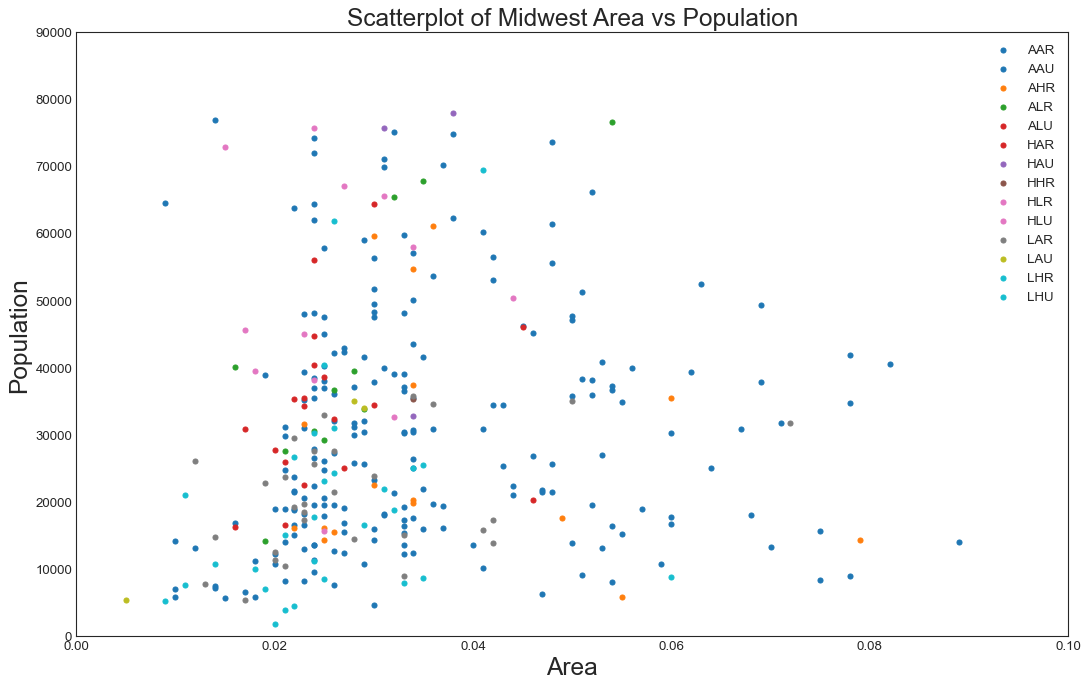

In [13]:
# 加载数据，原博客加载github数据，考虑到小伙伴们不一定正常访问，特打包供大伙下载，详见附件

midwest = pd.read_csv("./data/midwest_filter.csv")

# 此数据集 为美国中西部人口分布情况数据
# 本章 只有用到地区和人口情况两个特征

# 预处理数据
# 为分类 midwest['category'] 创建不同颜色
# 提取标签中的类别
categories = np.unique(midwest['category'])
# 这里的颜色用到 cm 的十号光谱 plt.cm.tab10()中输入任意浮点数，来提取出一种颜色
# 这种颜色会以元祖的形式返回，表示为四个浮点数组成的RGBA色彩空间或者三个浮点数组成的RGB色彩空间中的随机色彩

#只需要在循环中不断生成颜色就好了
#为了标签的名称，我们本来就需要循环和标签的类别数目一样的次数
#所以需要循环的次数 = 需要生成的颜色的次数 = 需要生成的小数的个数
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]


#丰富我们的图像

#对每一个标签类别进行绘图
plt.figure(figsize=(16, 10)   #绘图尺寸
           , dpi=80           #图像分辨率
           , facecolor='w'    #图像的背景颜色，设置为白色，默认也是白色
           , edgecolor='k'    #图像的边框颜色，设置为黑色，默认也是黑色
          )

#进行循环绘图
for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal', 
                data=midwest.loc[midwest.category==category, :], 
                s=20, c=[colors[i]], label=str(category))

# 对图像进行装饰
plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000), #控制横纵坐标的范围
              xlabel='Area', ylabel='Population')

plt.xticks(fontsize=12) #坐标轴上的标尺的字的大小
plt.yticks(fontsize=12)
plt.ylabel('Population',fontsize=22) #坐标轴上的标题和字体大小
plt.xlabel('Area',fontsize=22)
plt.title("Scatterplot of Midwest Area vs Population", fontsize=22) #整个图像的标题和字体的大小
plt.legend(fontsize=12) #图例的字体大小
plt.show()

### 02/50 带环绕的气泡图 (Bubble plot with Encircling)

有时您想显示边界内的一组点以强调它们的重要性。在此示例中，您从应该被包围的数据帧中获取记录，并将其传递给下面代码中的描述。`encircle()`
**画轮廓曲线 （Encircling），除了这里的多边形，还可以是椭圆** 在以后的文章将进一步的讲解。

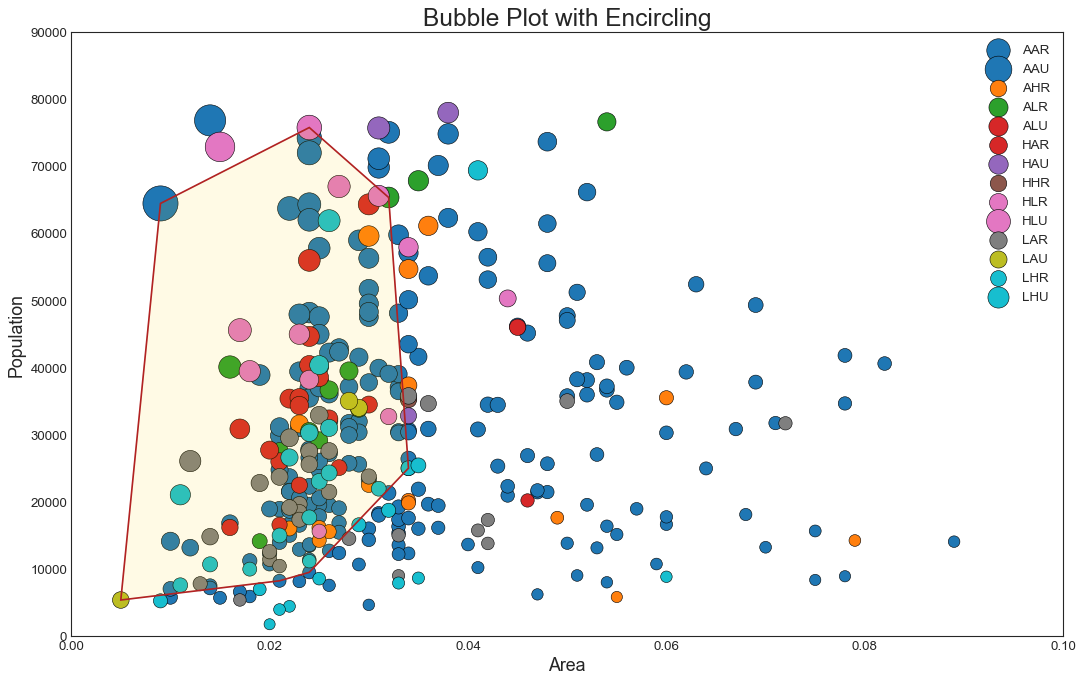

In [15]:
from matplotlib import patches
from scipy.spatial import ConvexHull
import warnings; warnings.simplefilter('ignore')
sns.set_style("white")

# 第一步 加载数据
midwest = pd.read_csv("./data/midwest_filter.csv")

# 尽可能用不同的颜色进行填充
categories = np.unique(midwest['category'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

# 第二步 每一个标签类别进行绘图
fig = plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')    

for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal', data=midwest.loc[midwest.category==category, :], s='dot_size', c=[colors[i]], label=str(category), edgecolors='black', linewidths=.5)

# 第三步: 画轮廓曲线 （Encircling），除了这里的多边形，还可以是椭圆
# https://stackoverflow.com/questions/44575681/how-do-i-encircle-different-data-sets-in-scatter-plot
def encircle(x,y, ax=None, **kw):
    if not ax: ax=plt.gca()
    p = np.c_[x,y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    ax.add_patch(poly)

# 选择轮廓的数据
midwest_encircle_data = midwest.loc[midwest.state=='IN', :]                         

# 画多边形的轮廓线    
encircle(midwest_encircle_data.area, midwest_encircle_data.poptotal, ec="k", fc="gold", alpha=0.1)
encircle(midwest_encircle_data.area, midwest_encircle_data.poptotal, ec="firebrick", fc="none", linewidth=1.5)

# 第四步 进行装饰
plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000),
              xlabel='Area', ylabel='Population')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Bubble Plot with Encircling", fontsize=22)
plt.legend(fontsize=12)    
plt.show()

### 03/50-1 具有最佳拟合线的散点图 (Scatter plot with line of best fit)

如果您想了解两个变量将如何影响，最佳拟合线就是您的选择。下图显示了数据中各个组之间的最佳拟合线有何不同。要禁用分组并仅为整个数据集绘制一条最佳拟合线，请从下面的调用中删除hue='cyl'参数。`sns.lmplot()`

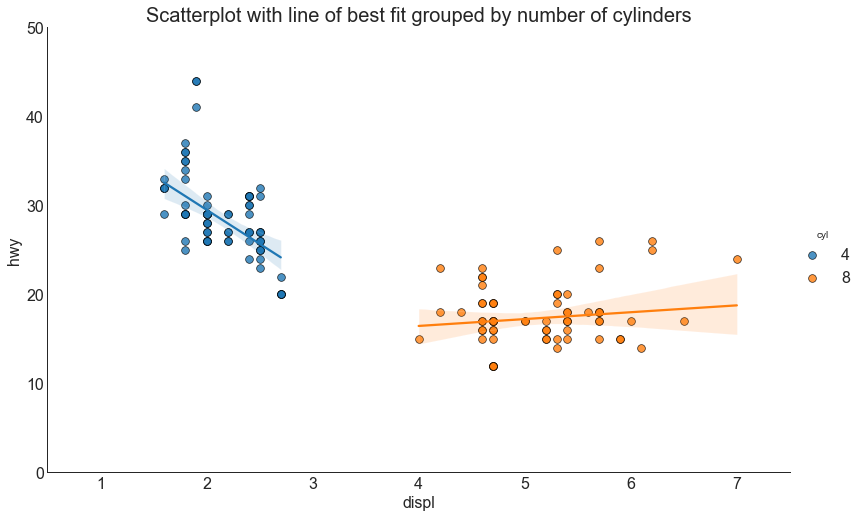

In [10]:
# 加载数据 
df = pd.read_csv("./data/mpg_ggplot2.csv")
df_select = df.loc[df.cyl.isin([4,8]), :]

# 画图
sns.set_style("white") # 图形式样
gridobj = sns.lmplot(x="displ", y="hwy", hue="cyl", data=df_select, 
#                      size=7, aspect=1.6, robust=True, palette='tab10', 
                     height=7, aspect=1.6, robust=True, palette='tab10', # 此为原作者的代码 ，在新的版本中 height 表示是放大系数，替代size
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black')) # scatter_kws 散点参加打包成字典

# 修饰
gridobj.set(xlim=(0.5, 7.5), ylim=(0, 50))
plt.title("Scatterplot with line of best fit grouped by number of cylinders", fontsize=20)
plt.show()

### 03/50-2 每条回归线在其自己的列中 (Each regression line in its own column)

另外，您也可以在其各自的列中显示每个组的最佳拟合线。您可以通过设置参数`col=groupingcolumn`来实现。

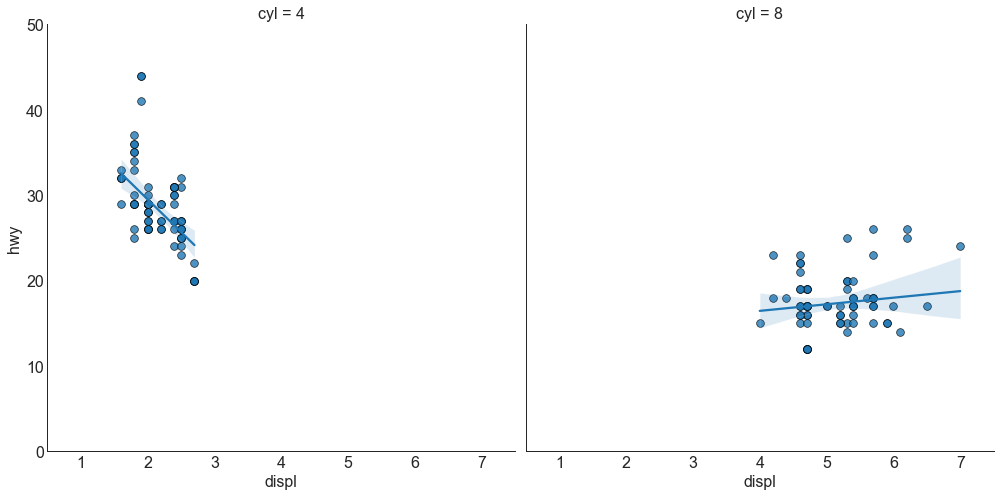

In [7]:
# 加载
df = pd.read_csv("./data/mpg_ggplot2.csv")
df_select = df.loc[df.cyl.isin([4,8]), :]

# 分别不同列来显示
sns.set_style("white")
gridobj = sns.lmplot(x="displ", y="hwy", 
                     data=df_select, 
                     size=7, #height=7, 
                     robust=True, 
                     palette='Set1', 
                     col="cyl",
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))

# 修饰
gridobj.set(xlim=(0.5, 7.5), ylim=(0, 50))
plt.show()

### 04/50  带状抖动图 (Jittering with stripplot)

通常多个数据点具有完全相同的 X 和 Y 值。结果，多个点相互绘制并隐藏。为避免这种情况，请稍微抖动点，以便您可以直观地看到它们。这很方便使用 seaborn 的.stripplot()。

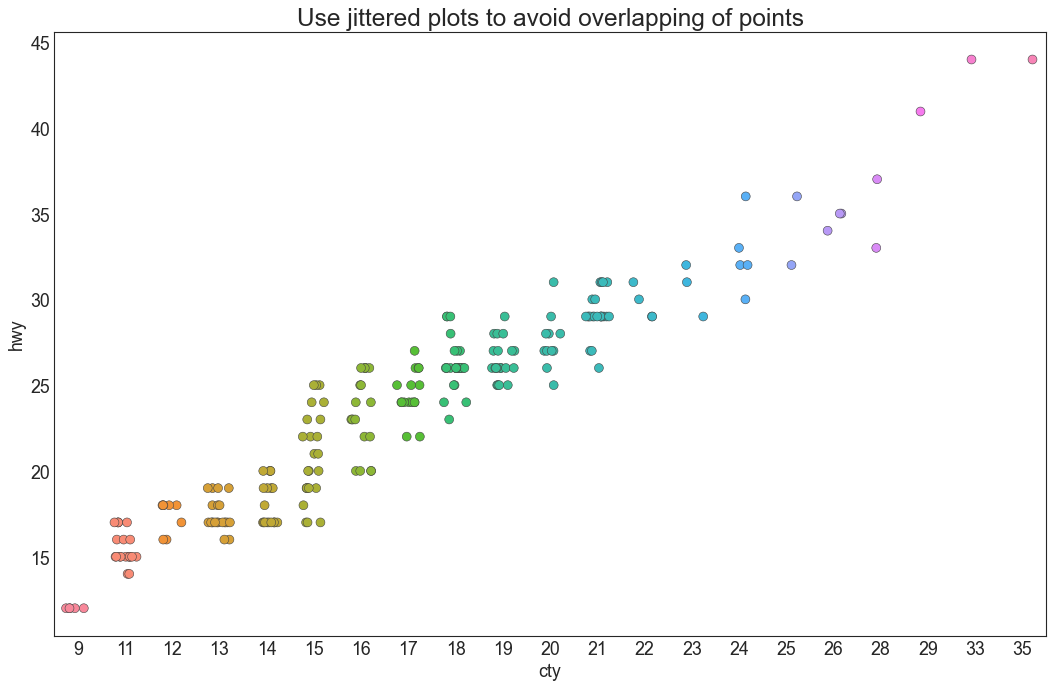

In [8]:
# 加载数据
df = pd.read_csv("./data/mpg_ggplot2.csv")

# 画抖动图
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
sns.stripplot(df.cty, df.hwy, jitter=0.25, size=8, ax=ax, linewidth=.5)

# 修饰
plt.title('Use jittered plots to avoid overlapping of points', fontsize=22)
plt.show()

### 05/50  计数图 (Counts Plot)

避免点重叠问题的另一个选择是根据该点中有多少点来增加点的大小。因此，点的大小越大，周围的点就越集中。

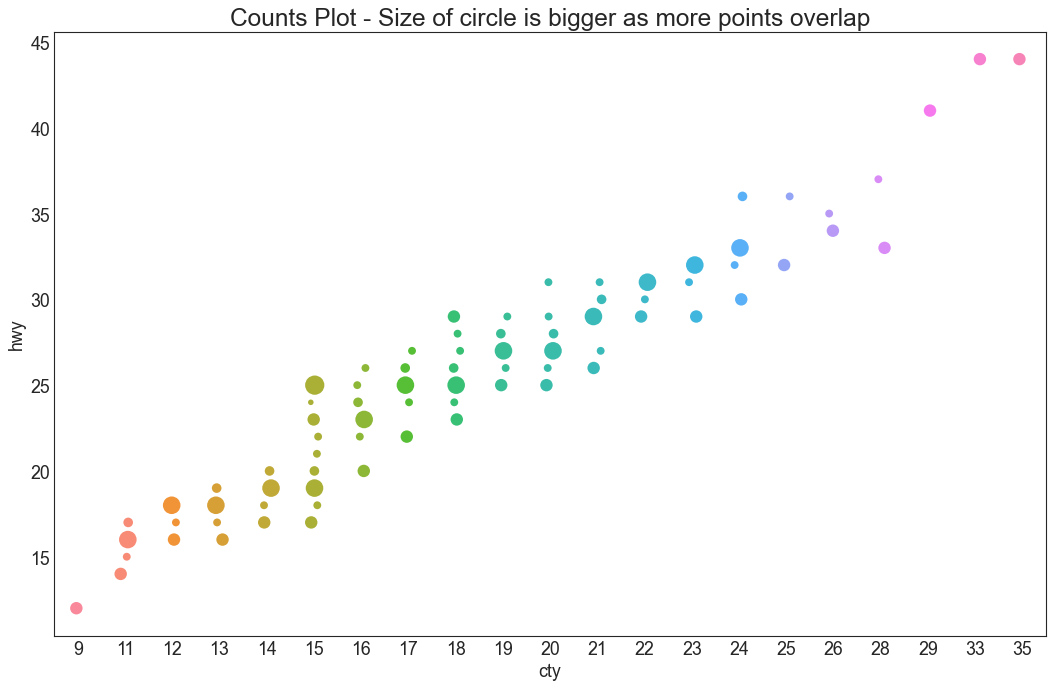

In [19]:
# 加载数据
df = pd.read_csv("./data/mpg_ggplot2.csv")

# 通过分组聚合
df_counts = df.groupby(['hwy', 'cty']).size().reset_index(name='counts')


#  画图
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
sns.stripplot(df_counts.cty, df_counts.hwy, sizes=df_counts.counts*25, ax=ax)
#ValueError: s must be a scalar, or float array-like with the same size as x and y

# 修饰
plt.title('Counts Plot - Size of circle is bigger as more points overlap', fontsize=22)
plt.show()

### 06/50 边际直方图 (Marginal Histogram)

边际直方图具有沿 X 和 Y 轴变量的直方图。这用于可视化 X 和 Y 之间的关系以及 X 和 Y 的单变量分布。该图经常用于探索性数据分析 (EDA)。

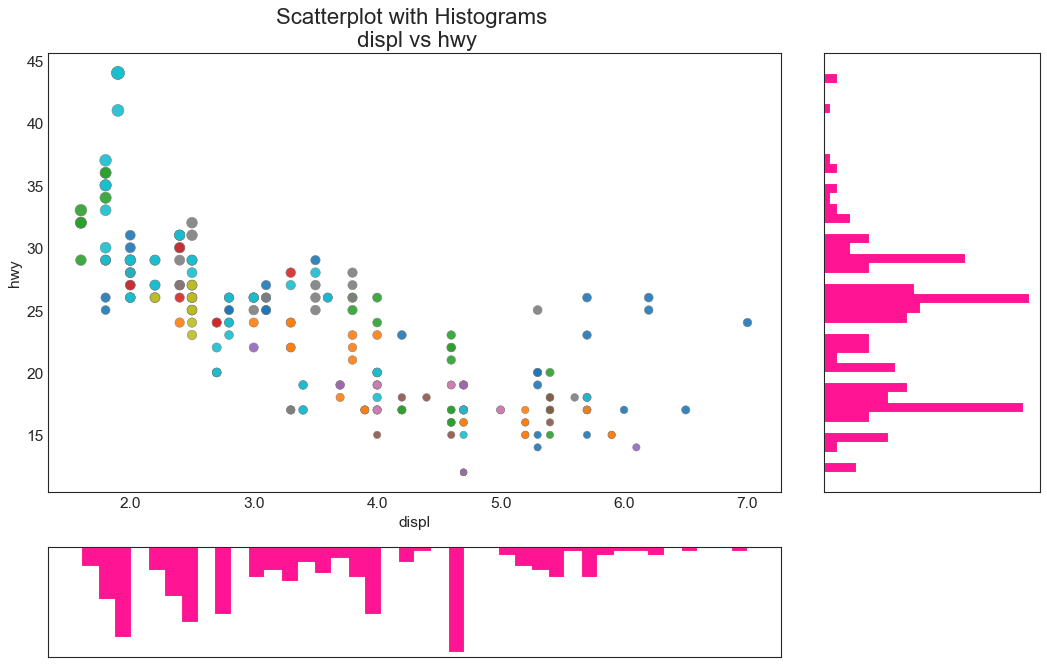

In [20]:
# 加载数据
df = pd.read_csv("./data/mpg_ggplot2.csv")

# 创建画布和网格
fig = plt.figure(figsize=(16, 10), dpi= 80)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

# 定义坐标轴
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

# 所有的点进行画散点图
ax_main.scatter('displ', 'hwy', s=df.cty*4, c=df.manufacturer.astype('category').cat.codes, alpha=.9, data=df,
                cmap="tab10", # 用 tab10 光谱填色
                edgecolors='gray', linewidths=.5)

# 直方图 投影到 右边
ax_bottom.hist(df.displ, 40, histtype='stepfilled', orientation='vertical', color='deeppink')
ax_bottom.invert_yaxis()

# 直方图 投影到 底部
ax_right.hist(df.hwy, 40, histtype='stepfilled', orientation='horizontal', color='deeppink')

# 修饰
ax_main.set(title='Scatterplot with Histograms \n displ vs hwy', xlabel='displ', ylabel='hwy')
ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)

xlabels = ax_main.get_xticks().tolist()
ax_main.set_xticklabels(xlabels)
plt.show()

### 07/50 边际箱线图 (Marginal Boxplot)

边际箱线图的用途与边际直方图相似。但是，箱线图有助于确定 X 和 Y 的中位数、第 25 和第 75 个百分位数(四分位)。

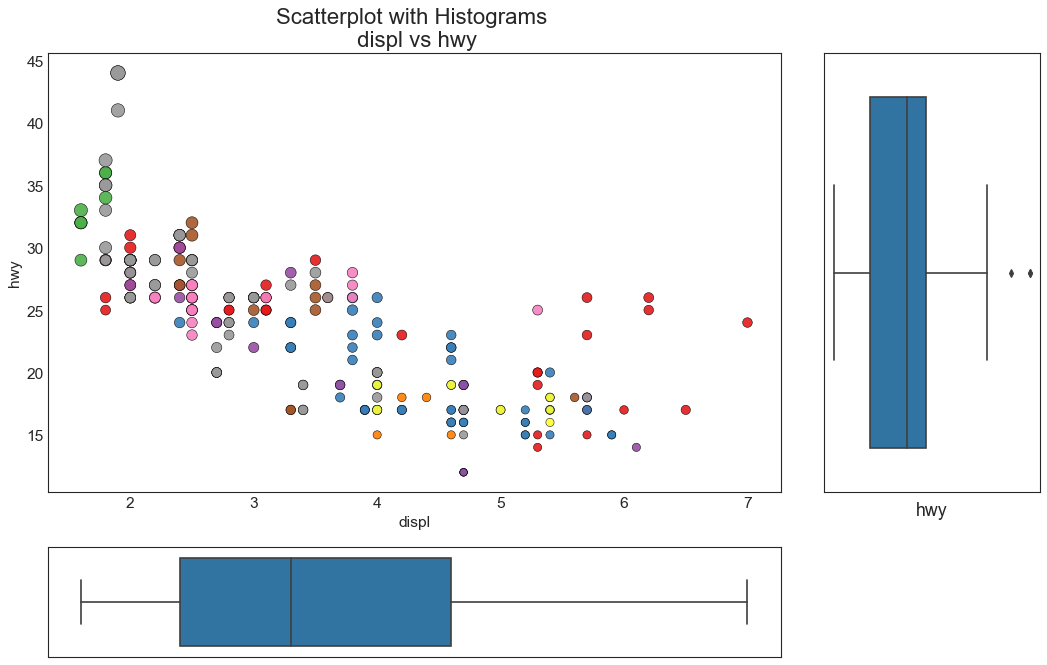

In [21]:
# 加载数据
df = pd.read_csv("./data/mpg_ggplot2.csv")

# 创建画布和网格
fig = plt.figure(figsize=(16, 10), dpi= 80)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

# 定义坐标轴
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

# 画散点图
ax_main.scatter('displ', 'hwy', s=df.cty*5, c=df.manufacturer.astype('category').cat.codes, alpha=.9, data=df, cmap="Set1", edgecolors='black', linewidths=.5)

# 分别增加横，纵会标的箱线图
sns.boxplot(df.hwy, ax=ax_right, orient="v")
sns.boxplot(df.displ, ax=ax_bottom, orient="h")

# 修饰 ------------------
# 移除 坐标轴标签名称
ax_bottom.set(xlabel='')
ax_right.set(ylabel='')

# 图的主标题
ax_main.set(title='Scatterplot with Histograms \n displ vs hwy', xlabel='displ', ylabel='hwy')

# 设置不同部分的字体
ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)

plt.show()

### 08/50 相关图 (Correllogram)

相关图用于直观地查看给定数据帧（或二维数组）中所有变量之间的相关性的量。
又称热力图 (heatmap)

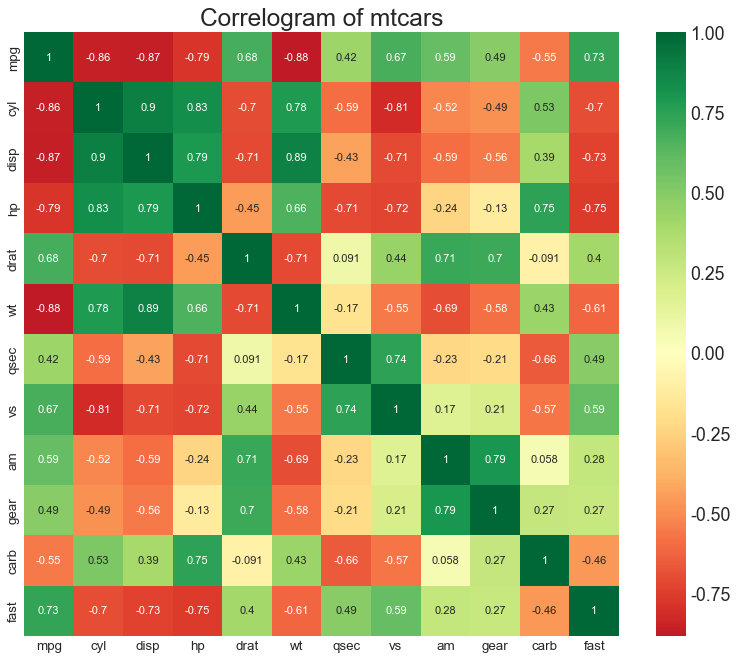

In [22]:
# 加载数据
df = pd.read_csv("./data/mtcars.csv")

# 图画
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns
            ,cmap='RdYlGn'
            , center=0
            , annot=True #标注数值
           )

# 修饰
plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### 09/50 成对图(Pairwise Plot)

成对图是探索性分析中最受欢迎的一种，用于了解所有可能的数值变量对之间的关系。它是双变量分析的必备工具。

<Figure size 800x640 with 0 Axes>

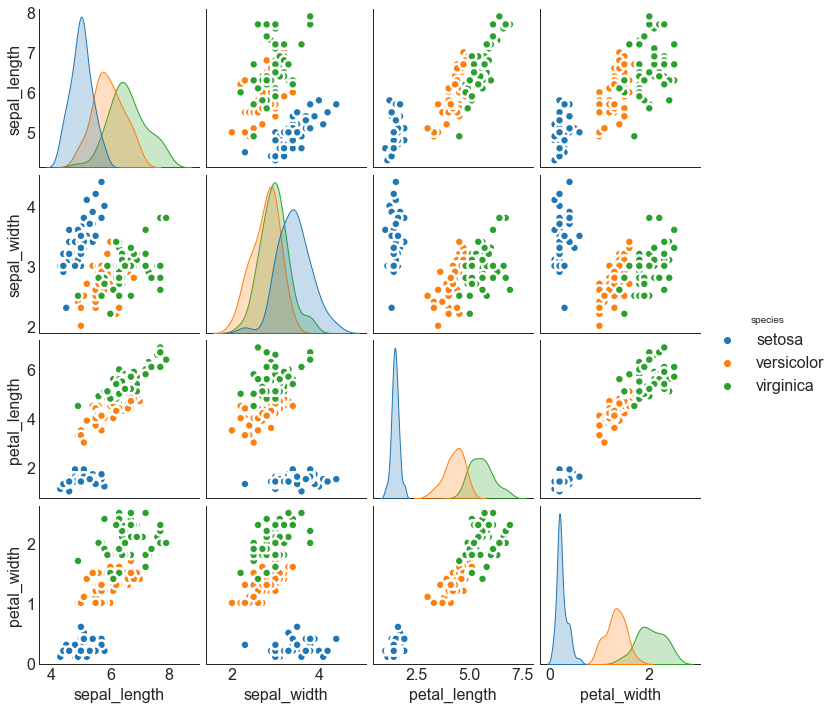

In [38]:
# 加载鸢尾花数据集
df = sns.load_dataset('iris')

# from sklearn import datasets
# ds = datasets.load_iris()
# x_data = ds.data  # .data返回iris数据集所有输入特征
# y_data = ds.target  # .target返回iris数据集所有标签
# df = pd.DataFrame(data=ds.data, columns=ds.feature_names)
# df['species'] = y_data

# 画图
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df
             , kind="scatter" # 这里是散点图
             , hue="species", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

<Figure size 800x640 with 0 Axes>

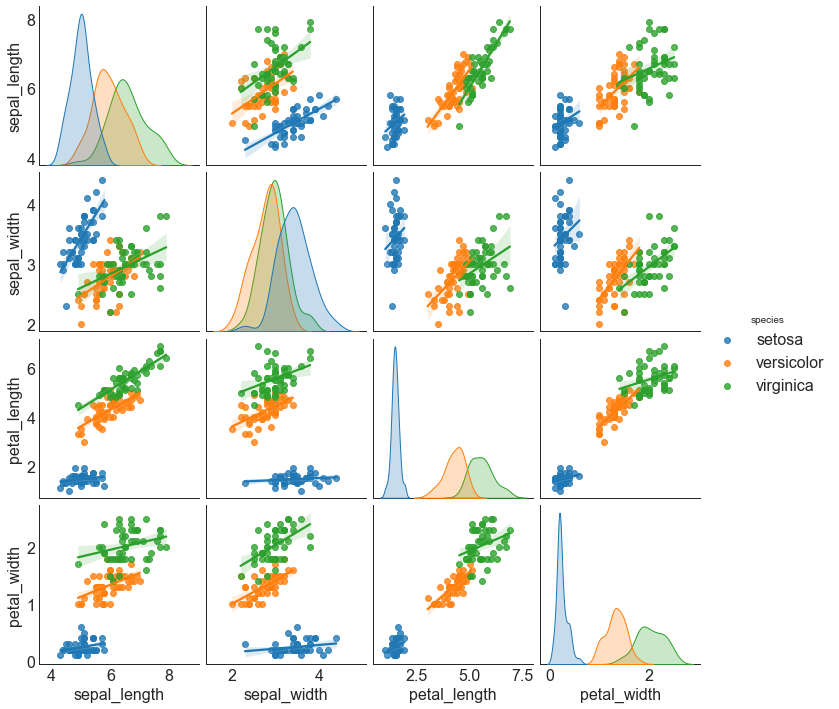

In [45]:
# 加载鸢尾花数据集
df = sns.load_dataset('iris')

# 画图
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df
             , kind="reg" # 这里是回归
             , hue="species"
            )
           
plt.show()

## 第二章 偏差图 (Deviation)

### 10/50  发散条形图 (Diverging Bars)

如果你想根据单个指标查看项目的变化情况，并可视化此差异的顺序和数量，那么发散条形图是一个很好的工具。
它有助于快速区分数据中的组的性能，并且非常直观，可以立即传达这一点。

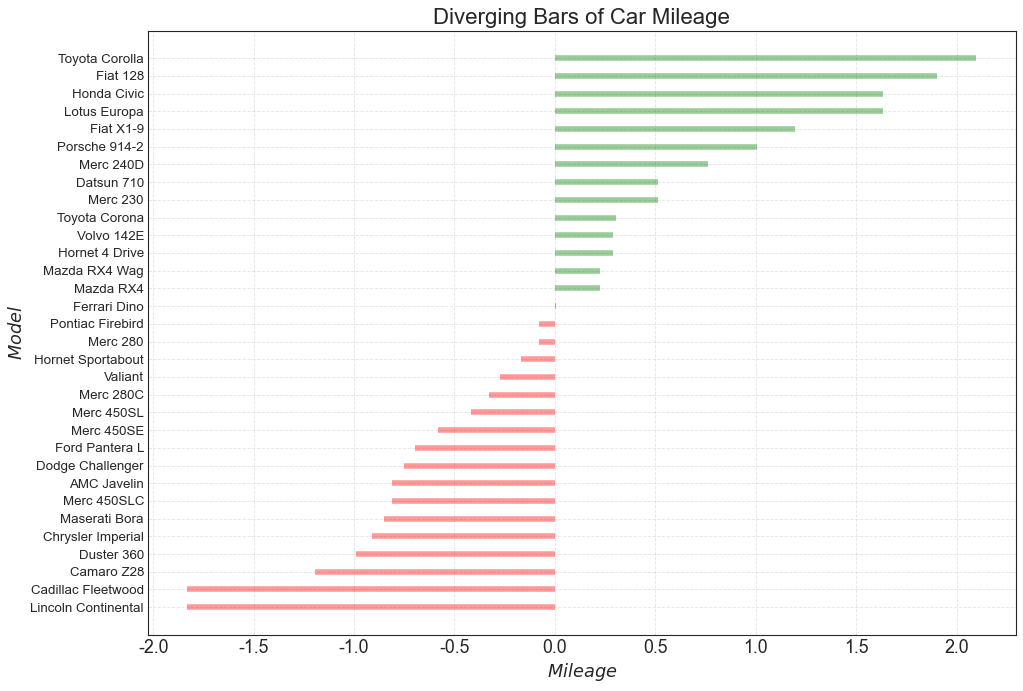

In [46]:
# 加载数据
df = pd.read_csv("./data/mtcars.csv")
x = df.loc[:, ['mpg']]
df['mpg_z'] = (x - x.mean())/x.std()
df['colors'] = ['red' if x < 0 else 'green' for x in df['mpg_z']]
df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True)

# 画图
plt.figure(figsize=(14,10), dpi= 80)
plt.hlines(y=df.index, xmin=0, xmax=df.mpg_z, color=df.colors, alpha=0.4, linewidth=5)

# 修饰
plt.gca().set(ylabel='$Model$', xlabel='$Mileage$')
plt.yticks(df.index, df.cars, fontsize=12)
plt.title('Diverging Bars of Car Mileage', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.show()

### 11/50 发散型文本（Diverging Texts）

分散的文本类似于发散条形图
如果你想以一种漂亮和可呈现的方式显示图表中每个项目的价值，那么它就是一个比较适合的方式。

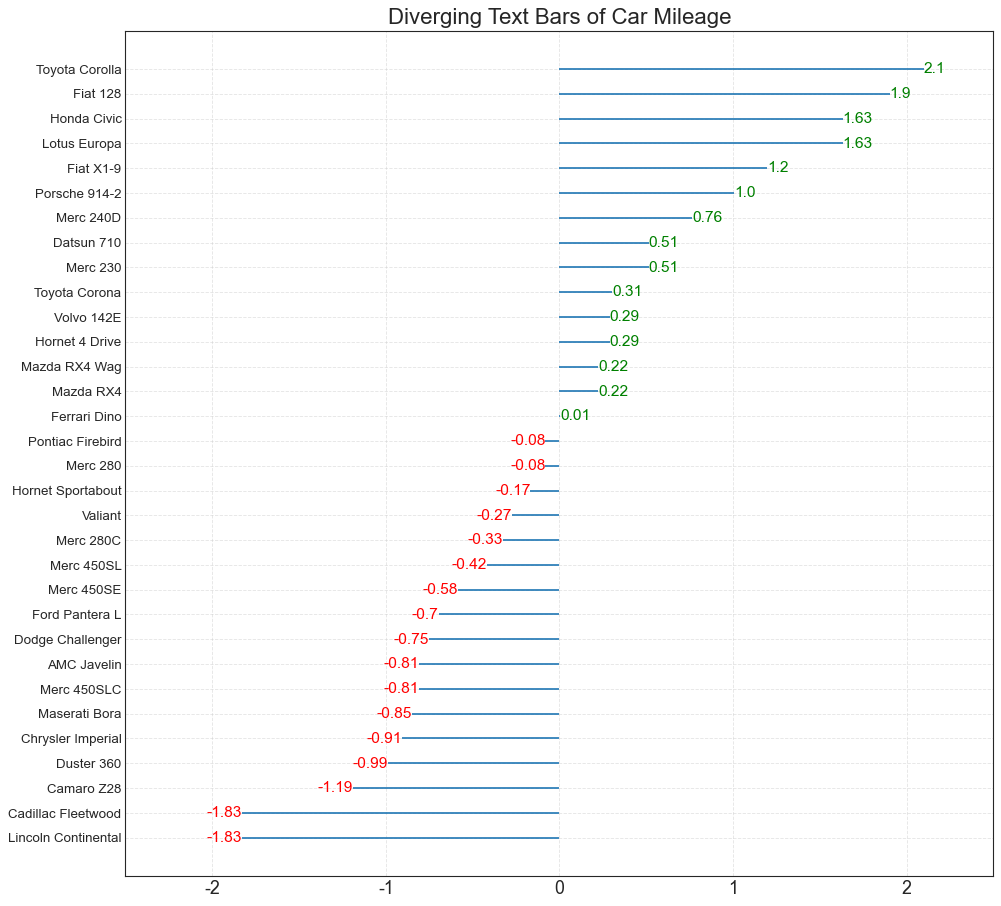

In [47]:
# 加载数据
df = pd.read_csv("./data/mtcars.csv")
x = df.loc[:, ['mpg']]    #提取目标数据 
df['mpg_z'] = (x - x.mean())/x.std()   #对目标数据进行Z-score标准化处理
df['colors'] = ['red' if x < 0 else 'green' for x in df['mpg_z']] #生成颜色标签列
df.sort_values('mpg_z', inplace=True)   #根据标准化之后的目标数据对整个数据集进行排序
df.reset_index(inplace=True)   #重置排序后的索引

# 画图
plt.figure(figsize=(14,14), dpi= 80)
plt.hlines(y=df.index, xmin=0, xmax=df.mpg_z)
for x, y, tex in zip(df.mpg_z, df.index, df.mpg_z):
    t = plt.text(x, y, round(tex, 2)   #获取一个需要显示的文本，这里用了round函数，四舍五入保留两位小数
                 , horizontalalignment='right' if x < 0 else 'left', #水平对齐参数，有left,right,center三种选择
                 verticalalignment='center',   #垂直对齐参数，有left,right,center三种选择
                 fontdict={'color':'red' if x < 0 else 'green', 'size':14}) # 根据数据 显示不同颜色

# 修饰
plt.yticks(df.index, df.cars, fontsize=12)   #y轴刻度标签，并设置文字大小
plt.title('Diverging Text Bars of Car Mileage', fontdict={'size':20}) #设置图形标题
plt.grid(linestyle='--', alpha=0.5) #配置网格线
plt.xlim(-2.5, 2.5)
plt.show()

这里需要说明的是：

1. 水平对齐参数，用了类似于列表推导式的式子，不同的是这里只需要单个值不需要最后形成列表
2. 另外，left和right这两个对齐方式很容易混淆
3. 以右对齐为例来说明：

    首先我们需要知道的是文本放置的位置点其实就是线条的末端
    所谓的右对齐就是要求文本的最右端要与这个位置点对齐

### 12/50 发散点图 (Diverging Dot Plot)

发散点图也类似于发散柱。然而，与发散条形相比，缺少条形会降低组之间的对比度和差异量。

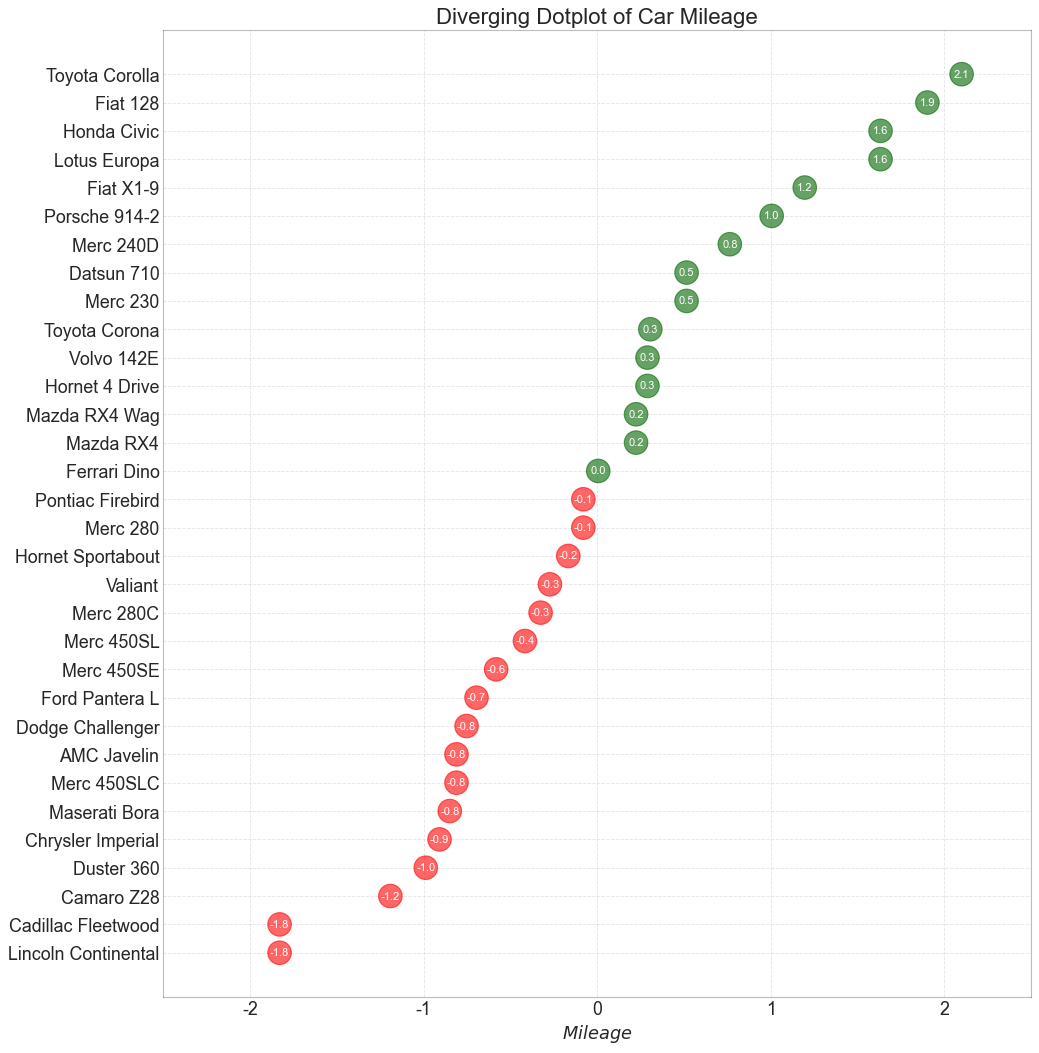

In [48]:
# 加载数据
df = pd.read_csv("./data/mtcars.csv")
x = df.loc[:, ['mpg']]
df['mpg_z'] = (x - x.mean())/x.std()
df['colors'] = ['red' if x < 0 else 'darkgreen' for x in df['mpg_z']]
df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True)

# 画图
plt.figure(figsize=(14,16), dpi= 80)
plt.scatter(df.mpg_z, df.index, s=450, alpha=.6, color=df.colors)  # 与上图的最大区别用散点图
for x, y, tex in zip(df.mpg_z, df.index, df.mpg_z):
    t = plt.text(x, y, round(tex, 1), horizontalalignment='center', 
                 verticalalignment='center', fontdict={'color':'white'})

# 修饰
# 增强边框效果
plt.gca().spines["top"].set_alpha(.3)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.3)
plt.gca().spines["left"].set_alpha(.3)

plt.yticks(df.index, df.cars)
plt.title('Diverging Dotplot of Car Mileage', fontdict={'size':20})
plt.xlabel('$Mileage$') 
plt.grid(linestyle='--', alpha=0.5)
plt.xlim(-2.5, 2.5)
plt.show()

### 13/50 带标记的分歧棒棒糖图 (Diverging Lollipop Chart with Markers)

带有标记的棒棒糖提供了一种灵活的可视化背离方式，通过强调您想要引起注意的任何重要数据点并在图表中适当地给出推理。

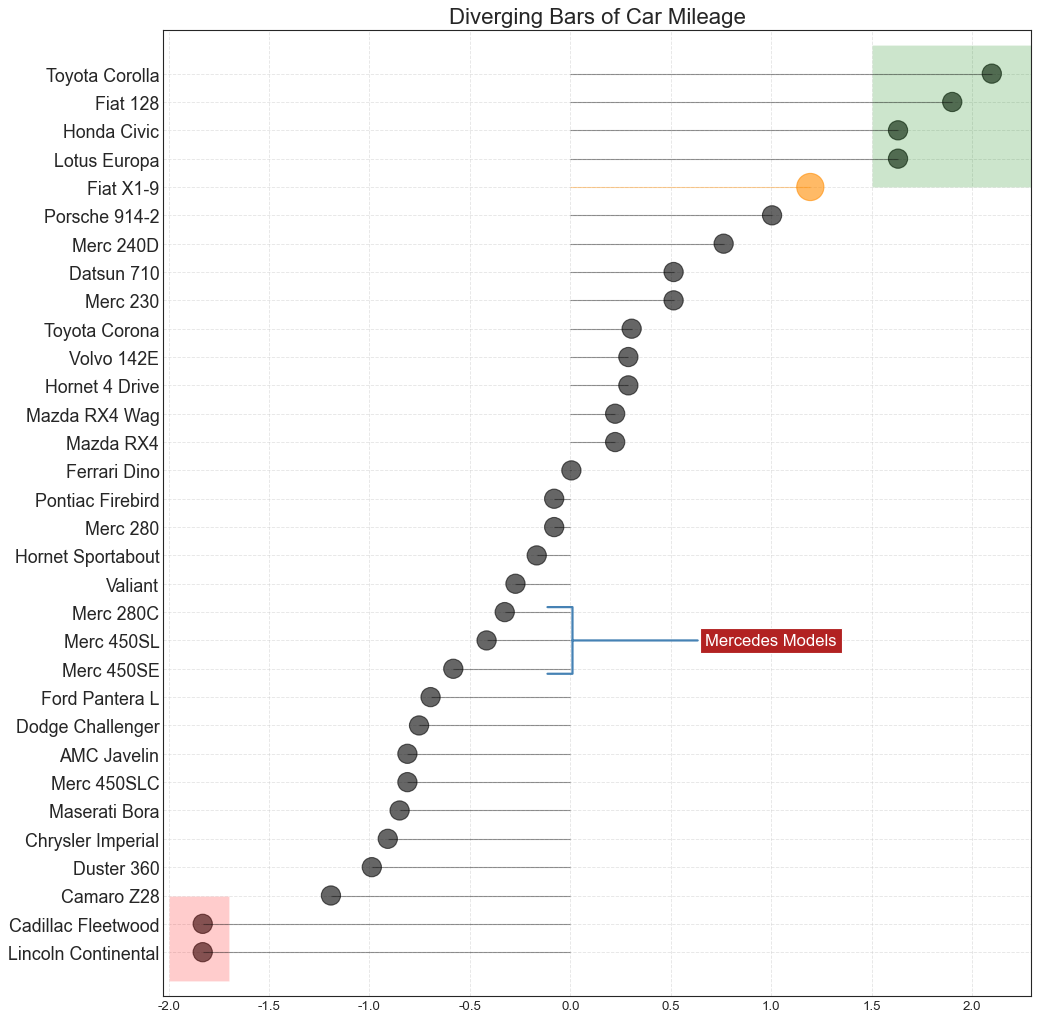

In [59]:
# 加载数据
df = pd.read_csv("./data/mtcars.csv")
x = df.loc[:, ['mpg']]
df['mpg_z'] = (x - x.mean())/x.std()
df['colors'] = 'black'

# 使用不同的颜色
df.loc[df.cars == 'Fiat X1-9', 'colors'] = 'darkorange'
df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True)


# 画图
import matplotlib.patches as patches #导入补丁模块

plt.figure(figsize=(14,16), dpi= 80)
plt.hlines(y=df.index, xmin=0, xmax=df.mpg_z, color=df.colors, alpha=0.4, linewidth=1)
plt.scatter(df.mpg_z, df.index, color=df.colors, s=[600 if x == 'Fiat X1-9' else 300 for x in df.cars], alpha=0.6)
plt.yticks(df.index, df.cars)
plt.xticks(fontsize=12)

# 添加注释
plt.annotate('Mercedes Models', xy=(0.0, 11.0), xytext=(1.0, 11), xycoords='data', 
            fontsize=15, ha='center', va='center',
            bbox=dict(boxstyle='square', fc='firebrick'),
            arrowprops=dict(arrowstyle='-[, widthB=2.0, lengthB=1.5', lw=2.0, color='steelblue'), color='white')

# 在图上打上绿色和红区域（补丁）
p1 = patches.Rectangle((-2.0, -1), width=.3, height=3, alpha=.2, facecolor='red')
p2 = patches.Rectangle((1.5, 27), width=.8, height=5, alpha=.2, facecolor='green')
plt.gca().add_patch(p1)
plt.gca().add_patch(p2)

# 修饰
plt.title('Diverging Bars of Car Mileage', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.show()

### 14/50 面积图 (Area Chart)


通过对轴和线之间的区域进行着色，面积图不仅更加强调波峰和波谷，还更加强调高点和低点的持续时间。高点持续时间越长，线下的面积就越大。

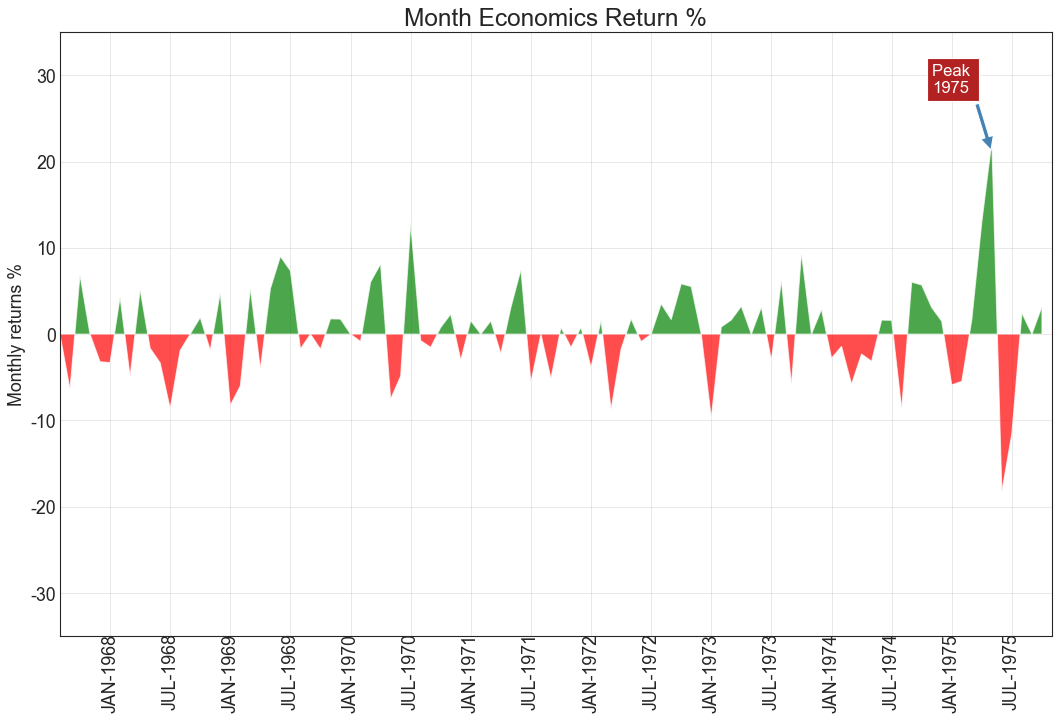

In [69]:
# 加载数据
df = pd.read_csv("./data/economics.csv", parse_dates=['date']).head(100) # 截取前100条记录
# 并 date 以日期方式加载
x = np.arange(df.shape[0])
y_returns = (df.psavert.diff().fillna(0)/df.psavert.shift(1)).fillna(0) * 100
# diff() 差分函数，结果第一个为空了，所以用0 来填充c
# shift(1) 平移函数，结果第一个也为空了，也用0来填空 
#  y_returns 即为百分率

#  图
plt.figure(figsize=(16,10), dpi= 80)

# 根据百分率的正负性，赋予不同颜色
# 填充图
plt.fill_between(x[1:], y_returns[1:], 0, where=y_returns[1:] >= 0, facecolor='green', interpolate=True, alpha=0.7)
plt.fill_between(x[1:], y_returns[1:], 0, where=y_returns[1:] <= 0, facecolor='red', interpolate=True, alpha=0.7)

# 添加注释 即图上Peak 1975 处
plt.annotate('Peak \n1975', xy=(94.0, 21.0), xytext=(88.0, 28),
             bbox=dict(boxstyle='square', fc='firebrick'),
             arrowprops=dict(facecolor='steelblue', shrink=0.05), fontsize=15, color='white')


# 修饰
xtickvals = [str(m)[:3].upper()+"-"+str(y) for y,m in zip(df.date.dt.year, df.date.dt.month_name())]
plt.gca().set_xticks(x[::6])
plt.gca().set_xticklabels(xtickvals[::6], rotation=90, fontdict={'horizontalalignment': 'center', 'verticalalignment': 'center_baseline'})
plt.ylim(-35,35)
plt.xlim(1,100)
plt.title("Month Economics Return %", fontsize=22)
plt.ylabel('Monthly returns %')
plt.grid(alpha=0.5)
plt.show()

## 第三章 排序图 (Ranking)

### 15/50 有序条形图 (Ordered Bar Chart)

有序条形图有效地传达了项目的排名顺序。排序图是Python可视化中最简单的图像之一，它的主要作用是帮助我们比较变量的大小
典型的排序图有：柱状图，坡度图，哑铃图……

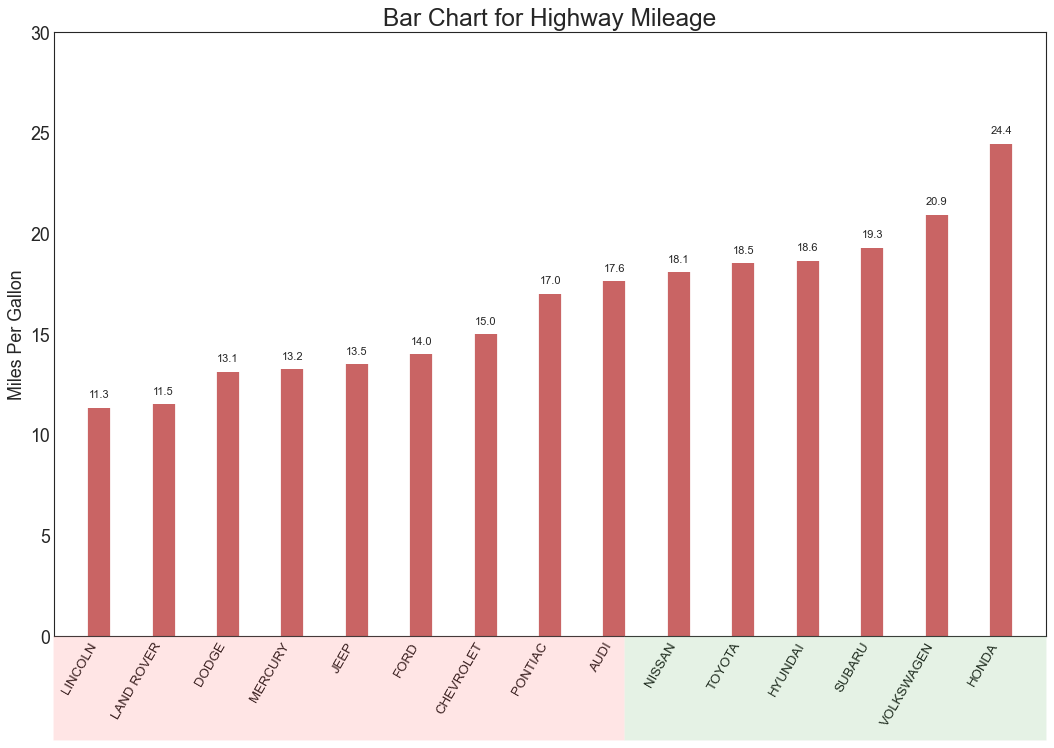

In [70]:
# 加载数据
df_raw = pd.read_csv("./data/mpg_ggplot2.csv")

#提取出我们需要的数据：使用groupby聚合每个品牌的车辆，求每个品牌下的城市里程/加仑的均值
df = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())
df.sort_values('cty', inplace=True)
df.reset_index(inplace=True)

# 加载补丁包
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(16,10), facecolor='white', dpi= 80)
ax.vlines(x=df.index, ymin=0, ymax=df.cty, color='firebrick', alpha=0.7, linewidth=20)

# 添加注释
for i, cty in enumerate(df.cty):
    ax.text(i, cty+0.5, round(cty, 1), horizontalalignment='center')


# 标题，枝条，刻度和坐标轴
ax.set_title('Bar Chart for Highway Mileage', fontdict={'size':22})
ax.set(ylabel='Miles Per Gallon', ylim=(0, 30))
plt.xticks(df.index, df.manufacturer.str.upper(), rotation=60, horizontalalignment='right', fontsize=12)

# 将补丁打在X轴，
p1 = patches.Rectangle((.57, -0.005), width=.33, height=.13, alpha=.1, facecolor='green', transform=fig.transFigure)
p2 = patches.Rectangle((.124, -0.005), width=.446, height=.13, alpha=.1, facecolor='red', transform=fig.transFigure)
fig.add_artist(p1)
fig.add_artist(p2)
plt.show()

### 16/50 棒棒糖图 (Lollipop Chart)

棒棒糖图以视觉上令人愉悦的方式与有序条形图具有类似的效果。

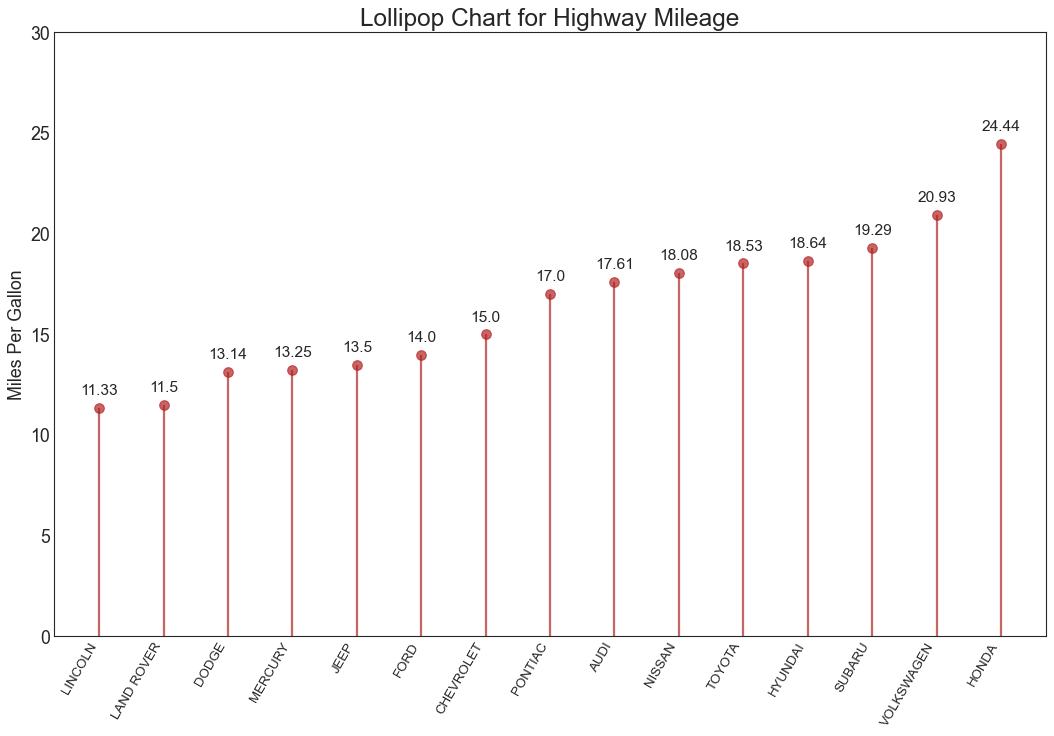

In [71]:
# 加载数据
df_raw = pd.read_csv("./data/mpg_ggplot2.csv")
df = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())
df.sort_values('cty', inplace=True)
df.reset_index(inplace=True)

# 画图
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
ax.vlines(x=df.index, ymin=0, ymax=df.cty, color='firebrick', alpha=0.7, linewidth=2)
ax.scatter(x=df.index, y=df.cty, s=75, color='firebrick', alpha=0.7)

# 标题，枝条，刻度和坐标轴
ax.set_title('Lollipop Chart for Highway Mileage', fontdict={'size':22})
ax.set_ylabel('Miles Per Gallon')
ax.set_xticks(df.index)
ax.set_xticklabels(df.manufacturer.str.upper(), rotation=60 # 坐标的标签，大写旋转60度
                   , fontdict={'horizontalalignment': 'right', 'size':12})
ax.set_ylim(0, 30)

# 添加注释 即数值
for row in df.itertuples():
    ax.text(row.Index, row.cty+.5, s=round(row.cty, 2), horizontalalignment= 'center', verticalalignment='bottom', fontsize=14)

plt.show()

### 17/50 点阵图 (Dot Plot)

点图表示项目的排名顺序。由于它是沿水平轴对齐的，因此您可以更轻松地可视化点之间的距离。

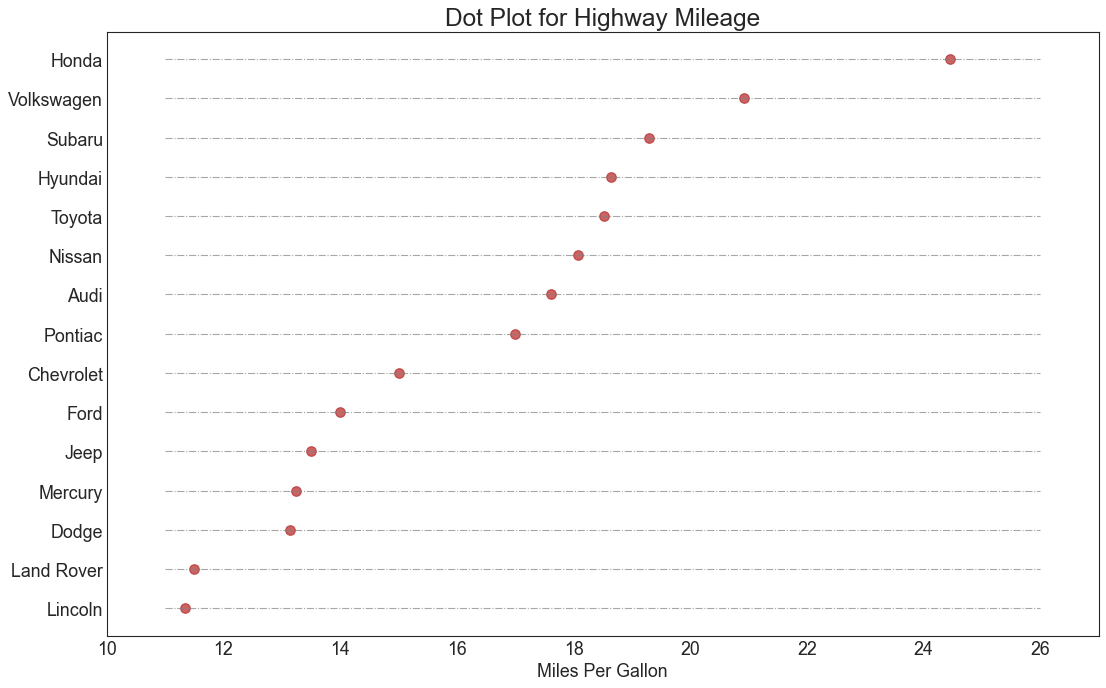

In [72]:
# 加载数据
df_raw = pd.read_csv("./data/mpg_ggplot2.csv")
df = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())
df.sort_values('cty', inplace=True)
df.reset_index(inplace=True)

# 画图
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
ax.hlines(y=df.index, xmin=11, xmax=26, color='gray', alpha=0.7, linewidth=1, linestyles='dashdot')
ax.scatter(y=df.index, x=df.cty, s=75, color='firebrick', alpha=0.7)

# 标题，枝条，刻度和坐标轴
ax.set_title('Dot Plot for Highway Mileage', fontdict={'size':22})
ax.set_xlabel('Miles Per Gallon')
ax.set_yticks(df.index)
ax.set_yticklabels(df.manufacturer.str.title(), fontdict={'horizontalalignment': 'right'})
ax.set_xlim(10, 27)
plt.show()

### 18/50 斜率图 (Slope Chart)

斜率图最适合比较给定人员/项目的“之前”和“之后”相对位置。

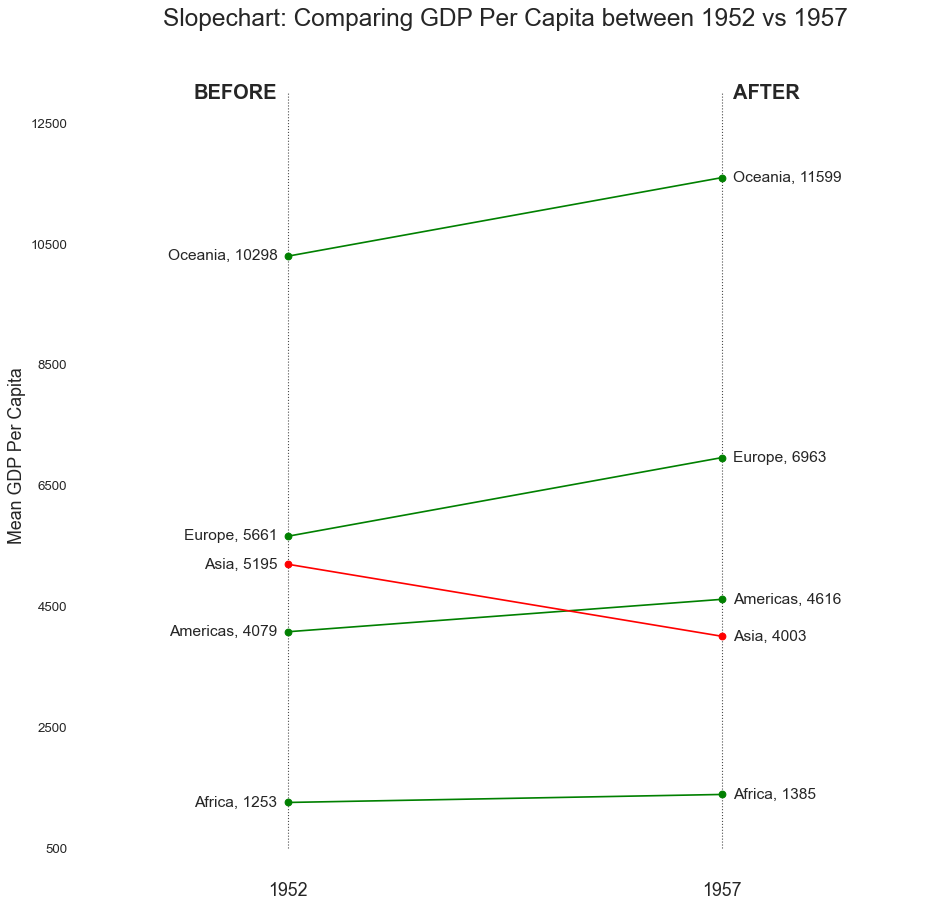

In [74]:
# 导入专用画线工具包
import matplotlib.lines as mlines
# 加载数据
df = pd.read_csv("./data/gdppercap.csv")

# 加载各洲 1952和1957 数据 ，如果出现负值用红色表示
left_label = [str(c) + ', '+ str(round(y)) for c, y in zip(df.continent, df['1952'])]
right_label = [str(c) + ', '+ str(round(y)) for c, y in zip(df.continent, df['1957'])]
klass = ['red' if (y1-y2) < 0 else 'green' for y1, y2 in zip(df['1952'], df['1957'])]

# 画线
# https://stackoverflow.com/questions/36470343/how-to-draw-a-line-with-matplotlib/36479941
def newline(p1, p2, color='black'):
    ax = plt.gca()
    l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='red' if p1[1]-p2[1] > 0 else 'green', marker='o', markersize=6)
    ax.add_line(l)
    return l

fig, ax = plt.subplots(1,1,figsize=(14,14), dpi= 80)

# 画两条垂直线
ax.vlines(x=1, ymin=500, ymax=13000, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=3, ymin=500, ymax=13000, color='black', alpha=0.7, linewidth=1, linestyles='dotted')

# 点
ax.scatter(y=df['1952'], x=np.repeat(1, df.shape[0]), s=10, color='black', alpha=0.7)
ax.scatter(y=df['1957'], x=np.repeat(3, df.shape[0]), s=10, color='black', alpha=0.7)

# 车分段和注释线
for p1, p2, c in zip(df['1952'], df['1957'], df['continent']):
    newline([1,p1], [3,p2])
    ax.text(1-0.05, p1, c + ', ' + str(round(p1)), horizontalalignment='right', verticalalignment='center', fontdict={'size':14})
    ax.text(3+0.05, p2, c + ', ' + str(round(p2)), horizontalalignment='left', verticalalignment='center', fontdict={'size':14})

# '之前' 和 '之后' 注释
ax.text(1-0.05, 13000, 'BEFORE', horizontalalignment='right', verticalalignment='center', fontdict={'size':18, 'weight':700})
ax.text(3+0.05, 13000, 'AFTER', horizontalalignment='left', verticalalignment='center', fontdict={'size':18, 'weight':700})

# 装饰
ax.set_title("Slopechart: Comparing GDP Per Capita between 1952 vs 1957", fontdict={'size':22})
ax.set(xlim=(0,4), ylim=(0,14000), ylabel='Mean GDP Per Capita')
ax.set_xticks([1,3])
ax.set_xticklabels(["1952", "1957"])
plt.yticks(np.arange(500, 13000, 2000), fontsize=12)

# 增强加框效果
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.0)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.0)
plt.show()

### 19/50哑铃图 (Dumbbell Plot)

哑铃图传达了各种物品的“之前”和“之后”位置以及物品的等级顺序。如果您想可视化特定项目/计划对不同对象的影响，它非常有用。

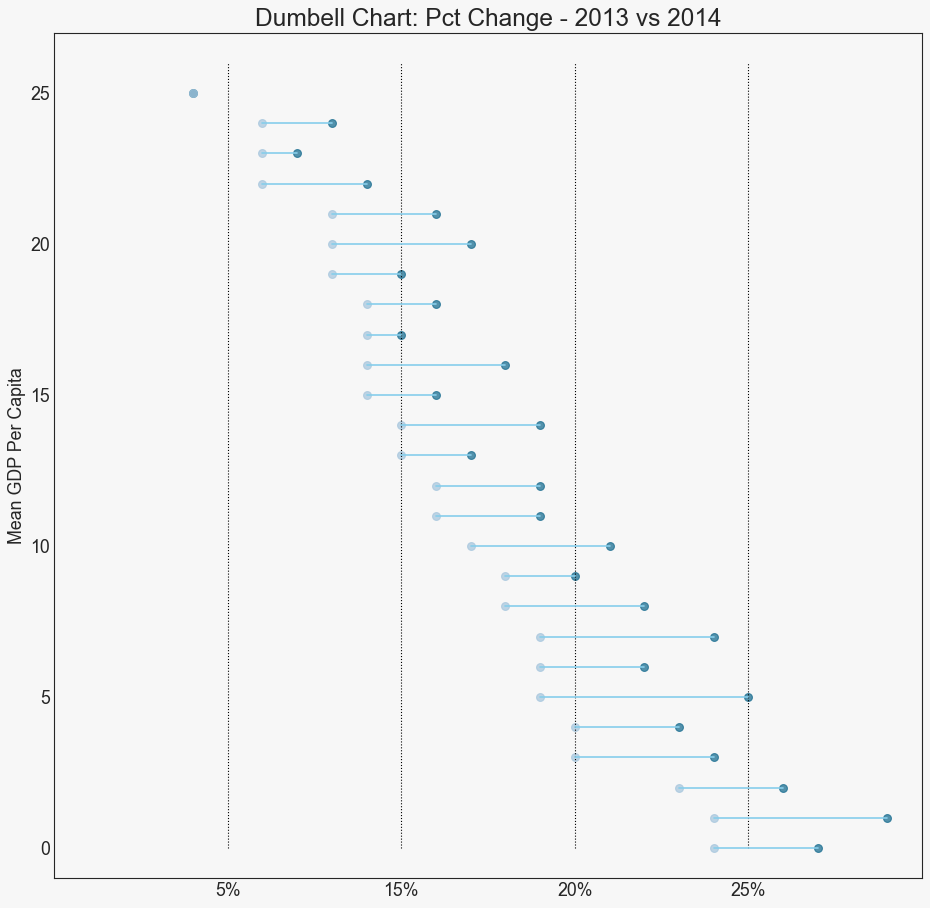

In [75]:
import matplotlib.lines as mlines

# 加载数据
df = pd.read_csv("./data/health.csv")
df.sort_values('pct_2014', inplace=True) # 按 pct_2014 排序
df.reset_index(inplace=True)  #重新索引

# 画线段函数
def newline(p1, p2, color='black'):
    ax = plt.gca()
    l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='skyblue')
    ax.add_line(l)
    return l

# 画布和图
fig, ax = plt.subplots(1,1,figsize=(14,14), facecolor='#f7f7f7', dpi= 80)

# 垂直线
ax.vlines(x=.05, ymin=0, ymax=26, color='black', alpha=1, linewidth=1, linestyles='dotted')
ax.vlines(x=.10, ymin=0, ymax=26, color='black', alpha=1, linewidth=1, linestyles='dotted')
ax.vlines(x=.15, ymin=0, ymax=26, color='black', alpha=1, linewidth=1, linestyles='dotted')
ax.vlines(x=.20, ymin=0, ymax=26, color='black', alpha=1, linewidth=1, linestyles='dotted')

# 点
ax.scatter(y=df['index'], x=df['pct_2013'], s=50, color='#0e668b', alpha=0.7)
ax.scatter(y=df['index'], x=df['pct_2014'], s=50, color='#a3c4dc', alpha=0.7)

# 线段
for i, p1, p2 in zip(df['index'], df['pct_2013'], df['pct_2014']):
    newline([p1, i], [p2, i])

# 装饰
ax.set_facecolor('#f7f7f7')
ax.set_title("Dumbell Chart: Pct Change - 2013 vs 2014", fontdict={'size':22})
ax.set(xlim=(0,.25), ylim=(-1, 27), ylabel='Mean GDP Per Capita')
ax.set_xticks([.05, .1, .15, .20])
ax.set_xticklabels(['5%', '15%', '20%', '25%'])
ax.set_xticklabels(['5%', '15%', '20%', '25%'])    
plt.show()

## 第四章 (Distribution)

### 20/50 连续变量的直方图 (Histogram for Continuous Variable)

直方图显示给定变量的频率分布。下面的表示形式根据类别变量对频率条进行分组，从而更深入地了解连续变量和分类变量。

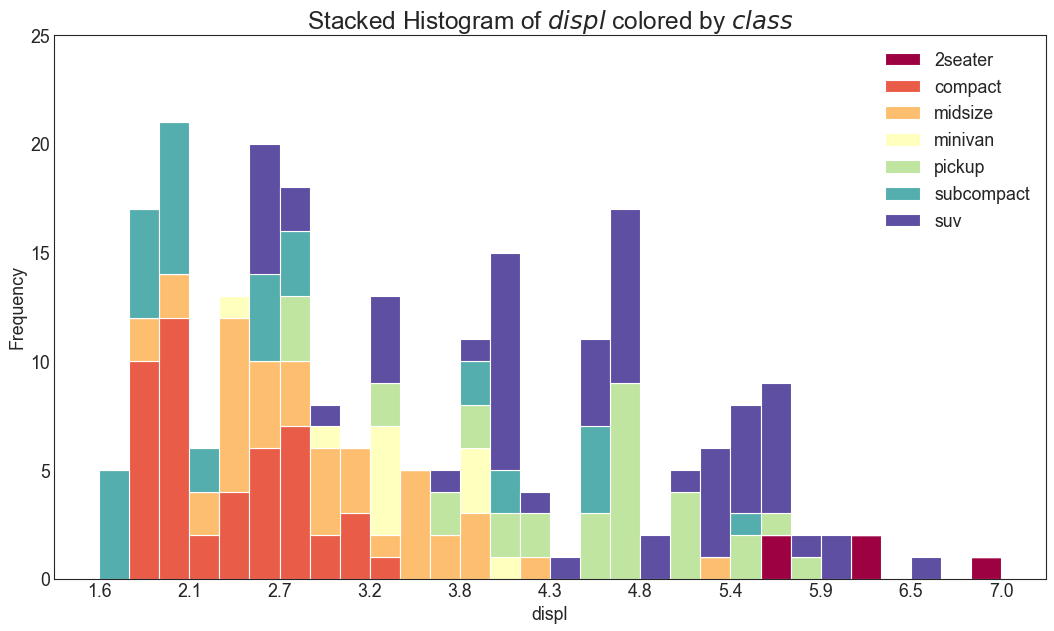

In [76]:
#  导入数据
df = pd.read_csv("./data/mpg_ggplot2.csv")

# 准备数据
x_var = 'displ'
groupby_var = 'class'
# 以类型进行分类聚合
df_agg = df.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df[x_var].values.tolist() for i, df in df_agg]

# 图
plt.figure(figsize=(16,9), dpi= 80)
# 用光谱图来填充颜色
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
# 画直方图
n, bins, patches = plt.hist(vals, 30, stacked=True, density=False, color=colors[:len(vals)])

# 修饰
plt.legend({group:col for group, col in zip(np.unique(df[groupby_var]).tolist(), colors[:len(vals)])})
plt.title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$", fontsize=22)
plt.xlabel(x_var)
plt.ylabel("Frequency")
plt.ylim(0, 25)
plt.xticks(ticks=bins[::3], labels=[round(b,1) for b in bins[::3]])
plt.show()

### 21/50 分类变量直方图 (Histogram for Categorical Variable)

类别变量的直方图显示该变量的频率分布。通过为条形着色，您可以可视化与表示颜色的另一个分类变量相关的分布。

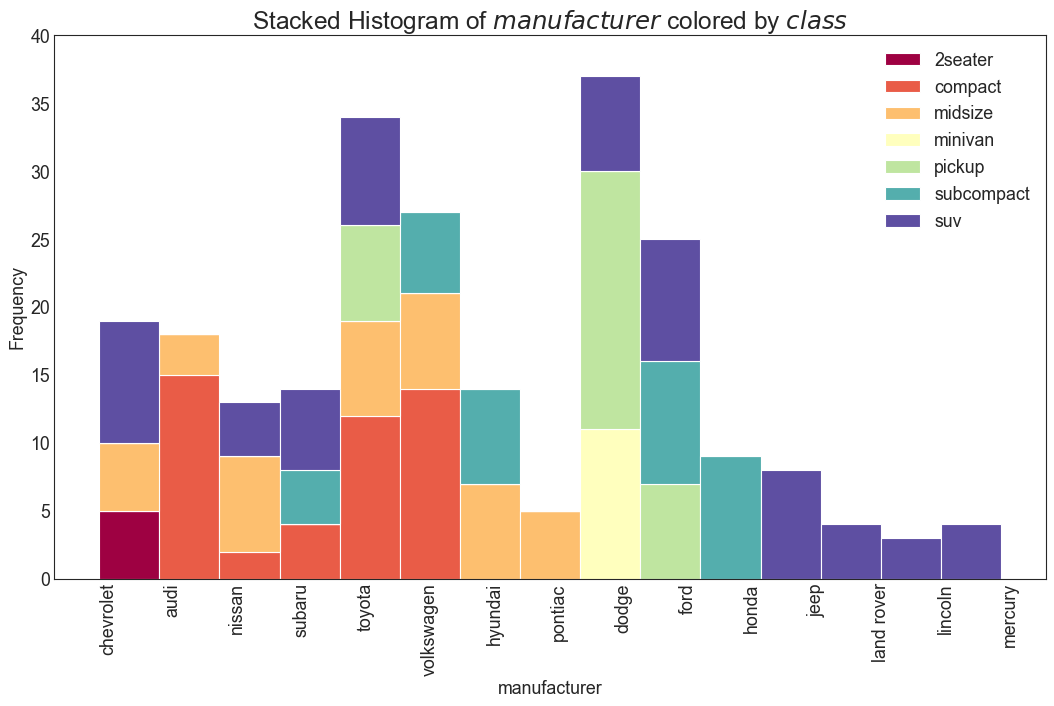

In [86]:
# 加载数据
df = pd.read_csv("./data/mpg_ggplot2.csv")

# 准备数据
x_var = 'manufacturer' 
groupby_var = 'class'
# 以品牌分类进行聚合
df_agg = df.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df[x_var].values.tolist() for i, df in df_agg]

# 画直方图
plt.figure(figsize=(16,9), dpi= 80)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, df[x_var].unique().__len__(), stacked=True, density=False, color=colors[:len(vals)])

# 修饰
plt.legend({group:col for group, col in zip(np.unique(df[groupby_var]).tolist(), colors[:len(vals)])})
plt.title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$", fontsize=22)
plt.xlabel(x_var)
plt.ylabel("Frequency")
plt.ylim(0, 40)
# plt.xticks(ticks=bins, labels=np.unique(df[x_var]).tolist(), rotation=90, horizontalalignment='left') 
#原作者代码 ，报错，是国为版本不同， 详细分析 bins的个数为16 ，而 labels的个数为15， 不一致所引起的
plt.xticks( rotation=90, horizontalalignment='left')
plt.show()

### 22/50 密度图 (Density Plot)

密度图是可视化连续变量分布的常用工具。通过按“响应”变量对它们进行分组，可以检查 X 和 Y 之间的关系。以下情况如果出于表示目的，以描述城市里程的分布如何随气缸数的变化而变化。

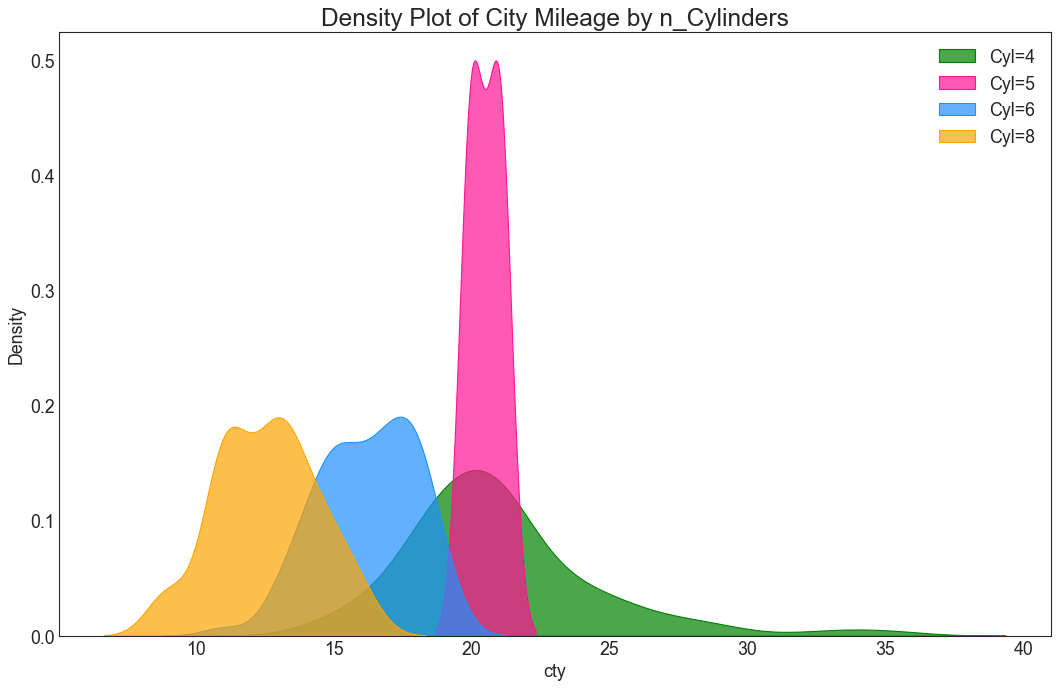

In [87]:
# 导入数据
df = pd.read_csv("./data/mpg_ggplot2.csv")

# 画图
plt.figure(figsize=(16,10), dpi= 80)
# 对于不同气缸数，用不同颜色
sns.kdeplot(df.loc[df['cyl'] == 4, "cty"], shade=True, color="g", label="Cyl=4", alpha=.7)
sns.kdeplot(df.loc[df['cyl'] == 5, "cty"], shade=True, color="deeppink", label="Cyl=5", alpha=.7)
sns.kdeplot(df.loc[df['cyl'] == 6, "cty"], shade=True, color="dodgerblue", label="Cyl=6", alpha=.7)
sns.kdeplot(df.loc[df['cyl'] == 8, "cty"], shade=True, color="orange", label="Cyl=8", alpha=.7)

# 修饰
plt.title('Density Plot of City Mileage by n_Cylinders', fontsize=22)
plt.legend()
plt.show()

### 23/50 带直方图的密度曲线 (Density Curves with Histogram)

带有直方图的密度曲线将两个图传达的集体信息汇集在一起，因此您可以将它们都放在一个图中，而不是两个图中。

<Figure size 1280x800 with 0 Axes>

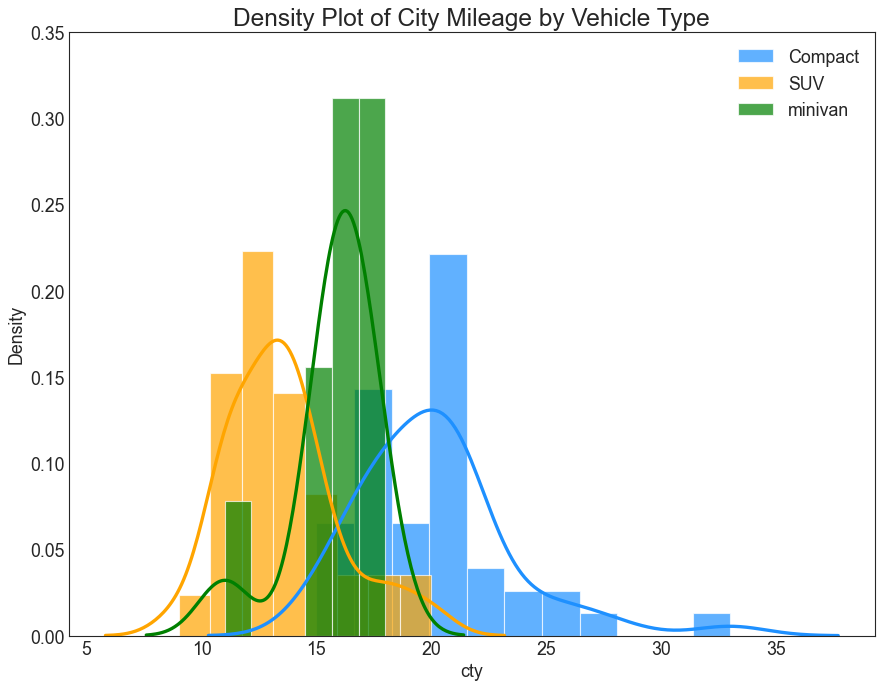

In [88]:
# 导入数据
df = pd.read_csv("./data/mpg_ggplot2.csv")

# 画图
plt.figure(figsize=(16,10), dpi= 80)
# 对于不同类型，用不同颜色
plt.figure(figsize=(13,10), dpi= 80)
sns.distplot(df.loc[df['class'] == 'compact', "cty"], color="dodgerblue", label="Compact", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
sns.distplot(df.loc[df['class'] == 'suv', "cty"], color="orange", label="SUV", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
sns.distplot(df.loc[df['class'] == 'minivan', "cty"], color="g", label="minivan", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
plt.ylim(0, 0.35)


# 修饰
plt.title('Density Plot of City Mileage by Vehicle Type', fontsize=22)
plt.legend()
plt.show()

### 24/50 Joy 图 (Joy Plot)

Joy 图允许不同组的密度曲线重叠，这是可视化大量组彼此之间分布的好方法。它看起来赏心悦目，并清晰地传达了正确的信息。可以使用基于 `joypy` 的软件包轻松构建它。

<Figure size 1280x800 with 0 Axes>

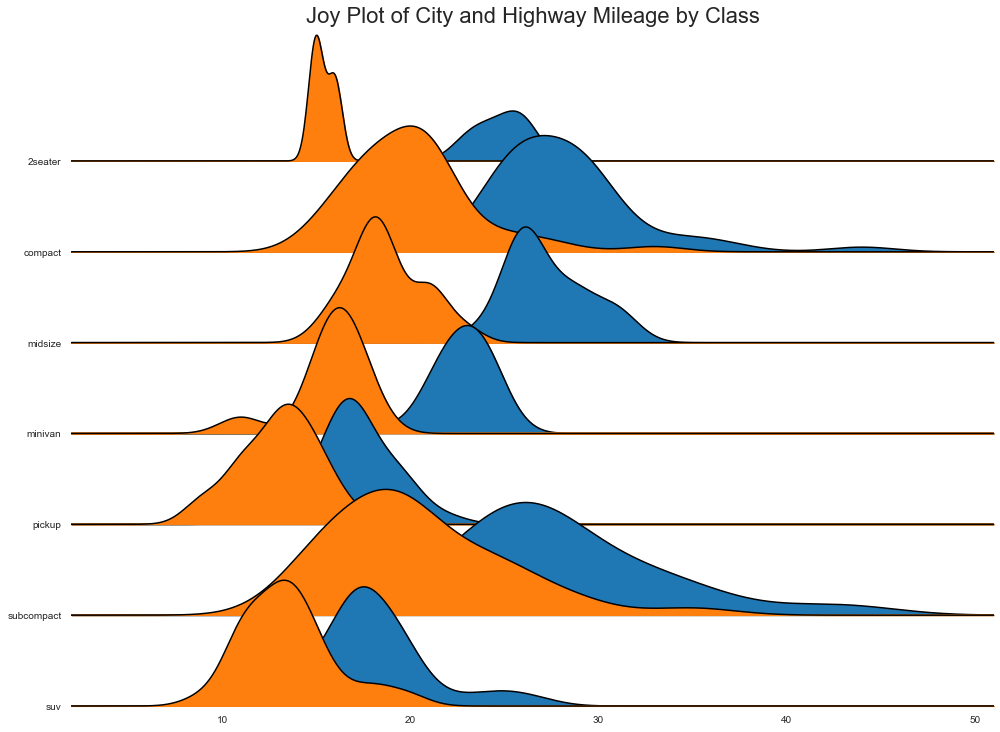

In [5]:
# 如果未安装，请安装 joypy 包
# !pip install joypy

import joypy

# 导入数据
mpg = pd.read_csv("./data/mpg_ggplot2.csv")

# 图
plt.figure(figsize=(16,10), dpi= 80)
fig, axes = joypy.joyplot(mpg, column=['hwy', 'cty'], by="class", ylim='own', figsize=(14,10))

# 修饰
plt.title('Joy Plot of City and Highway Mileage by Class', fontsize=22)
plt.show()

### 25/50 分布点阵图 (Distributed Dot Plot)

分布式点图显示了按组分割的点的单变量分布。点越暗，该区域中数据点的集中度就越高。通过以不同的方式着色中位数，组的实际位置立即变得明显。

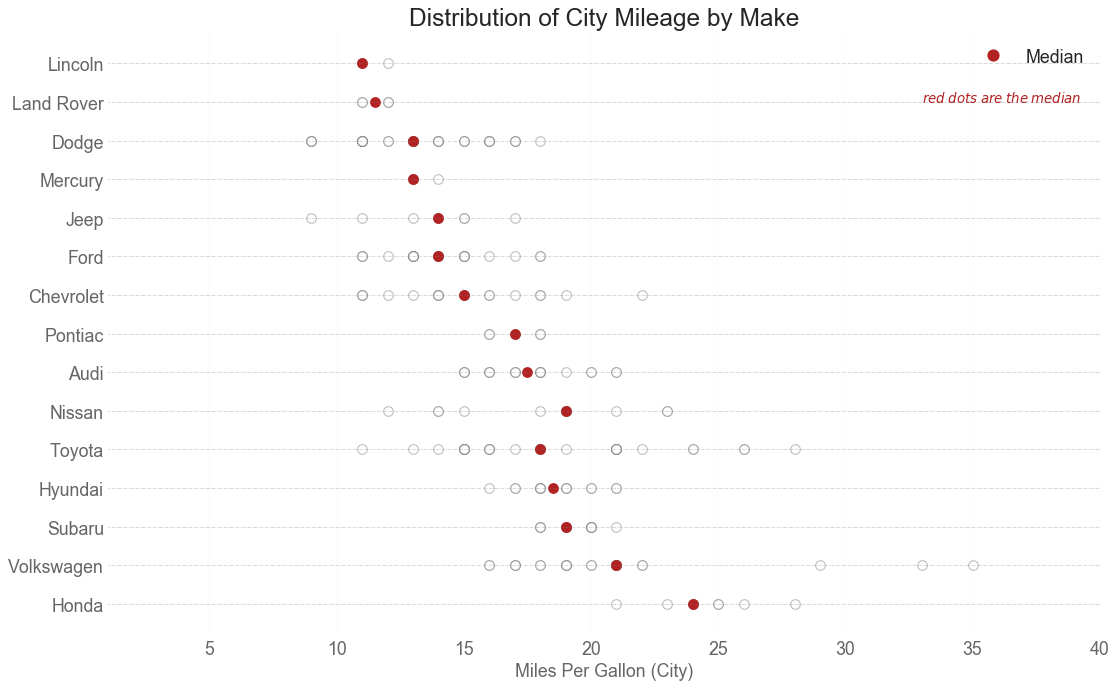

In [5]:
import matplotlib.patches as mpatches

# 加载数据
df_raw = pd.read_csv("./data/mpg_ggplot2.csv")

# 按气缸数显示不同颜色
cyl_colors = {4:'tab:red', 5:'tab:green', 6:'tab:blue', 8:'tab:orange'}
df_raw['cyl_color'] = df_raw.cyl.map(cyl_colors)

# 按品牌划分的平均值和中值城市里程
df = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())
df.sort_values('cty', ascending=False, inplace=True)
df.reset_index(inplace=True)
# df_median = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.median())
df_median = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.median())

# 画水平线
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
ax.hlines(y=df.index, xmin=0, xmax=40, color='gray', alpha=0.5, linewidth=.5, linestyles='dashdot')

# 画点
for i, make in enumerate(df.manufacturer):
    df_make = df_raw.loc[df_raw.manufacturer==make, :]
    ax.scatter(y=np.repeat(i, df_make.shape[0]), x='cty', data=df_make, s=75, edgecolors='gray', c='w', alpha=0.5)
    ax.scatter(y=i, x='cty', data=df_median.loc[df_median.index==make, :], s=75, c='firebrick')

# 添加注释    
ax.text(33, 13, "$red \; dots \; are \; the \: median$", fontdict={'size':12}, color='firebrick')

# 修饰
red_patch = plt.plot([],[], marker="o", ms=10, ls="", mec=None, color='firebrick', label="Median")
plt.legend(handles=red_patch)
ax.set_title('Distribution of City Mileage by Make', fontdict={'size':22})
ax.set_xlabel('Miles Per Gallon (City)', alpha=0.7)
ax.set_yticks(df.index)
ax.set_yticklabels(df.manufacturer.str.title(), fontdict={'horizontalalignment': 'right'}, alpha=0.7)
ax.set_xlim(1, 40)
plt.xticks(alpha=0.7)
plt.gca().spines["top"].set_visible(False)    
plt.gca().spines["bottom"].set_visible(False)    
plt.gca().spines["right"].set_visible(False)    
plt.gca().spines["left"].set_visible(False)   
plt.grid(axis='both', alpha=.4, linewidth=.1)
plt.show()

### 26/50 盒图 (Box Plot)

盒图是一种可视化分布的好方法，记住中位数、25%、 75% (四分位)和异常值。但是，您需要小心解释框的大小，这可能会扭曲该组中包含的点数。因此，手动提供每个框中的观察次数可以帮助克服这个缺点。例如，左边的前两个盒子的尺寸相同，尽管它们分别有 5 块和 47 块。因此，有必要写下该组中的观察次数。

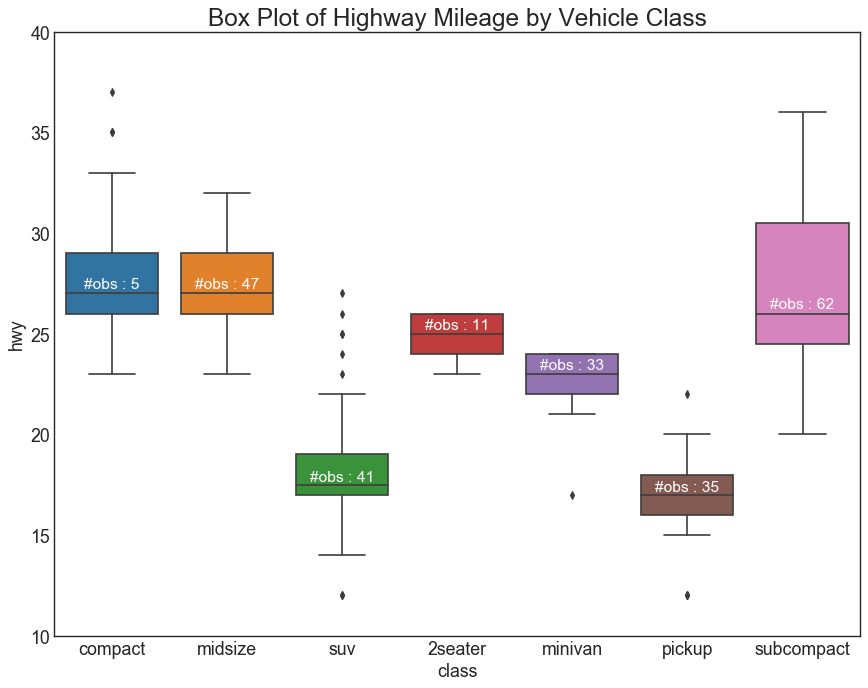

In [6]:
#  加载数据
df = pd.read_csv("./data/mpg_ggplot2.csv")

# 画图
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='class', y='hwy', data=df, notch=False)

# 盒图中增加 N 个盒 (optional)
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values
    for (x, xticklabel), n_ob in zip(enumerate(xticklabels), n_obs):
        plt.text(x, medians_dict[xticklabel]*1.01, "#obs : "+str(n_ob), horizontalalignment='center', fontdict={'size':14}, color='white')

add_n_obs(df,group_col='class',y='hwy')    

# 修饰
plt.title('Box Plot of Highway Mileage by Vehicle Class', fontsize=22)
plt.ylim(10, 40)
plt.show()

### 27/50 点盒图 (Dot + Box Plot) 

点盒图 传达与分组箱线图相似的信息。此外，这些点还可以让您了解每组中有多少数据点。

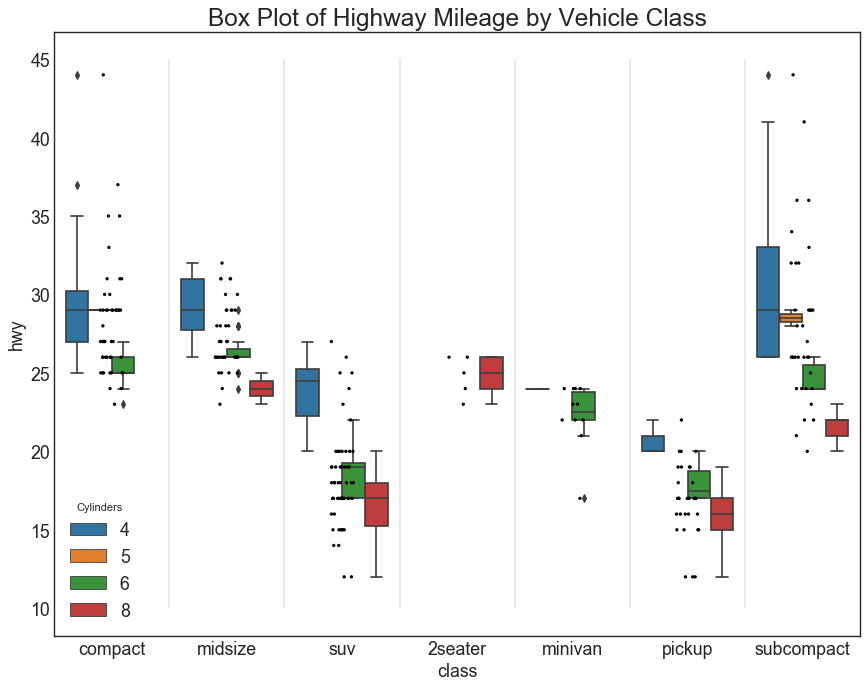

In [7]:
# 加载数据
df = pd.read_csv("./data/mpg_ggplot2.csv")

# 画图
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='class', y='hwy', data=df, hue='cyl')
sns.stripplot(x='class', y='hwy', data=df, color='black', size=3, jitter=1)

for i in range(len(df['class'].unique())-1):
    plt.vlines(i+.5, 10, 45, linestyles='solid', colors='gray', alpha=0.2)

# 修饰
plt.title('Box Plot of Highway Mileage by Vehicle Class', fontsize=22)
plt.legend(title='Cylinders')
plt.show()

### 28/50 小提琴图 (Violin Plot)

小提琴图是箱形图的视觉上令人愉悦的替代品。小提琴的形状或面积取决于它所拥有的观察次数。但是，小提琴情节可能更难阅读，并且在专业环境中不常用。

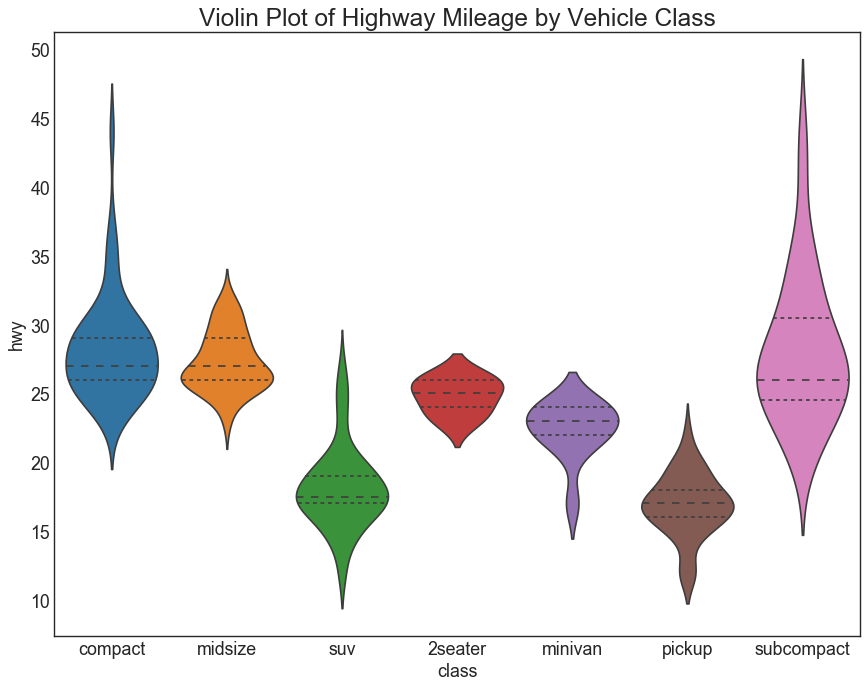

In [8]:
# 加载数据
df = pd.read_csv("./data/mpg_ggplot2.csv")

# 画图
plt.figure(figsize=(13,10), dpi= 80)
sns.violinplot(x='class', y='hwy', data=df, scale='width', inner='quartile')

# 修饰
plt.title('Violin Plot of Highway Mileage by Vehicle Class', fontsize=22)
plt.show()

### 29/50 人口金字塔 (Population Pyramid)

人口金字塔可用于显示按体积排序的组的分布。或者它也可以用于显示人口的逐步过滤，因为它在下面用于显示有多少人通过了营销漏斗的每个阶段。

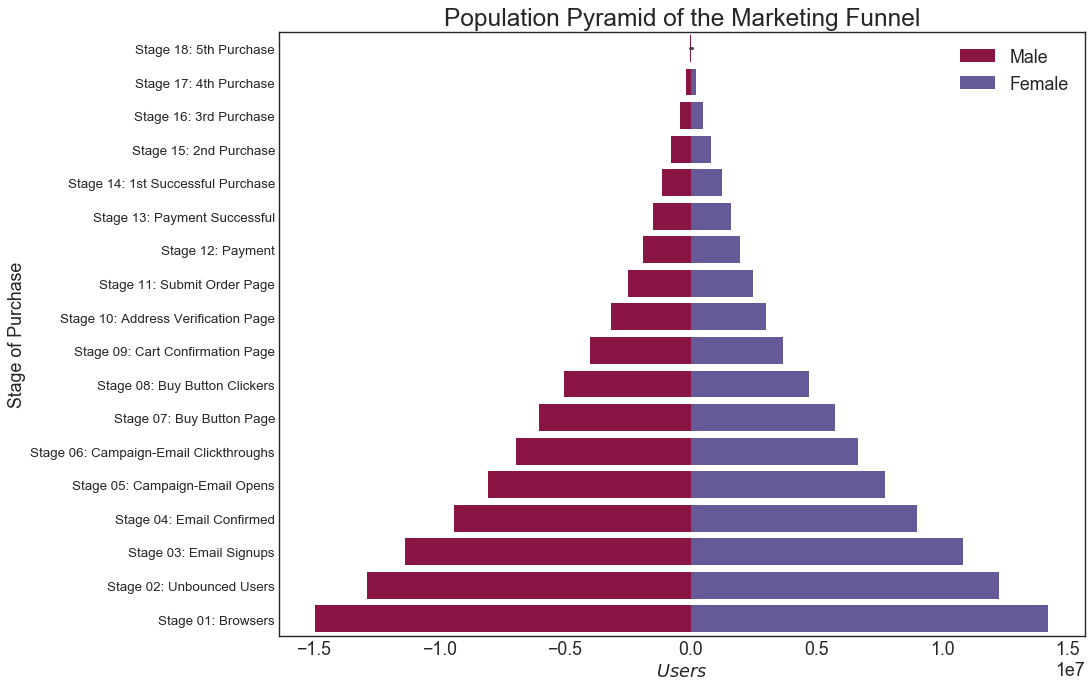

In [9]:
# 加载数据
df = pd.read_csv("./data/email_campaign_funnel.csv")

# 画图
plt.figure(figsize=(13,10), dpi= 80)
group_col = 'Gender'
order_of_bars = df.Stage.unique()[::-1]
colors = [plt.cm.Spectral(i/float(len(df[group_col].unique())-1)) for i in range(len(df[group_col].unique()))]

for c, group in zip(colors, df[group_col].unique()):
    sns.barplot(x='Users', y='Stage', data=df.loc[df[group_col]==group, :], order=order_of_bars, color=c, label=group)

# 修饰   
plt.xlabel("$Users$")
plt.ylabel("Stage of Purchase")
plt.yticks(fontsize=12)
plt.title("Population Pyramid of the Marketing Funnel", fontsize=22)
plt.legend()
plt.show()

### 30/50 分类图 (Categorical Plots)

库提供的分类图seaborn可用于可视化 2 个或更多分类变量彼此相关的计数分布。

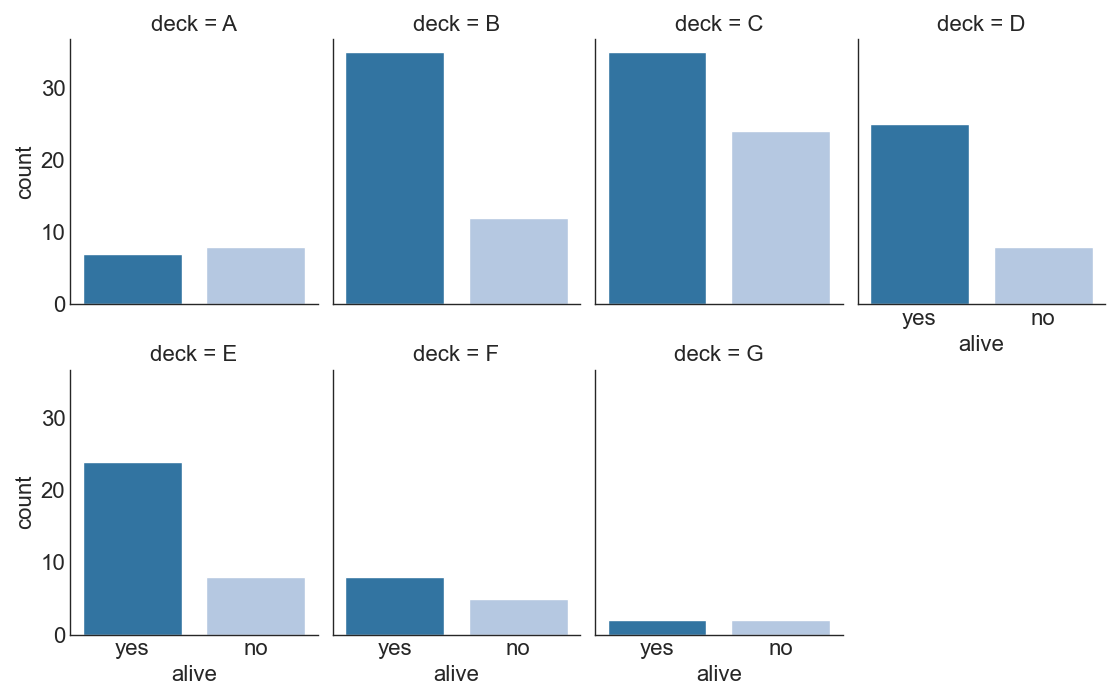

In [9]:
# 加载数据
titanic = sns.load_dataset("titanic")

# 画图
g = sns.catplot("alive", col="deck", col_wrap=4,
                data=titanic[titanic.deck.notnull()],
                kind="count", height=3.5, aspect=.8, 
                palette='tab20')

# fig.suptitle('sf')
plt.show()

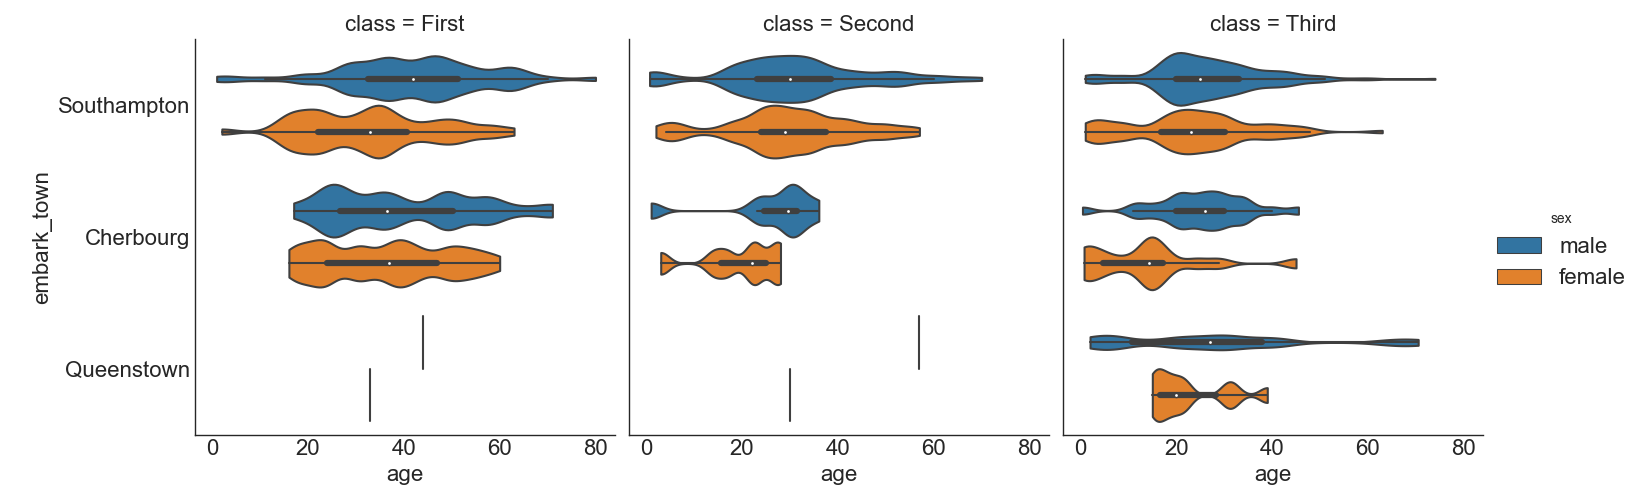

In [9]:
titanic = sns.load_dataset("titanic")

# 画图
sns.catplot(x="age", y="embark_town",
            hue="sex", col="class",
            data=titanic[titanic.embark_town.notnull()],
            orient="h", height=5, aspect=1, palette="tab10",
            kind="violin", dodge=True, cut=0, bw=.2)